# Dependencies, set up and API

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import requests
import pandas as pd
import json
import numpy as np
import time

In [2]:
# URL for GET requests to retrieve vehicle data

url = "https://data.cms.gov/resource/tcsp-6e99.json?$limit=200000"

# Create a variable for and print the response object to the console to make sure we have a connection to the API
Response = requests.get(url)
print(Response)


<Response [200]>


In [3]:
# Create a variable to hold the response data in json format
Response_Data = Response.json()

# print(json.dumps(Response_Data, indent=4, sort_keys=True))


# Understanding the entire dataset - 196,325 observations

In [4]:
# Generate a DataFrame from the response data
DataFrame = pd.DataFrame(Response_Data)

# Display top 5 rows of dataframe for reference

DataFrame.head()

,drg_definition,provider_id,provider_name,provider_street_address,provider_city,provider_state,provider_zip_code,hospital_referral_region,total_discharges,average_covered_charges,average_total_payments,average_medicare_payments
0,023 - CRANIOTOMY W MAJOR DEVICE IMPLANT OR ACU...,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,28,117117.7857,25823.71429,24057.39286
1,025 - CRANIOTOMY & ENDOVASCULAR INTRACRANIAL P...,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,32,98357.5625,20688.34375,19791.40625
2,027 - CRANIOTOMY & ENDOVASCULAR INTRACRANIAL P...,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,11,69153.54546,11811.18182,8194.363636
3,037 - EXTRACRANIAL PROCEDURES W MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,12,100427.3333,19134,18154
4,038 - EXTRACRANIAL PROCEDURES W CC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,17,58199.47059,8519.470588,6714.882353


In [5]:
# Display a statistical overview of the DataFrame for reference

DataFrame.describe()

,drg_definition,provider_id,provider_name,provider_street_address,provider_city,provider_state,provider_zip_code,hospital_referral_region,total_discharges,average_covered_charges,average_total_payments,average_medicare_payments
count,196325,196325,196325,196325,196325,196325,196325,196325,196325,196325,196325,196325
unique,563,3182,3077,3172,1905,51,2899,306,784,195067,190125,189584
top,871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV >96 H...,100007,GOOD SAMARITAN HOSPITAL,601 E ROLLINS ST,CHICAGO,CA,77030,MA - Boston,11,53410,6150,5900
freq,2838,388,532,388,1641,15216,594,4079,15019,4,6,7


In [6]:
# Check to see if there are any incomplete rows
DataFrame.count()

drg_definition               196325
provider_id                  196325
provider_name                196325
provider_street_address      196325
provider_city                196325
provider_state               196325
provider_zip_code            196325
hospital_referral_region     196325
total_discharges             196325
average_covered_charges      196325
average_total_payments       196325
average_medicare_payments    196325
dtype: int64

In [7]:
# Calculate the Number of Unique Diagnosis Related Groups (DRGs): 
Unique_DRGs = len(DataFrame["drg_definition"].unique())
Unique_DRGs

563

In [8]:
# Calculate the Number of Unique Providers: 
Unique_Provider_count = len(DataFrame["provider_id"].unique())
Unique_Provider_count

3182

In [9]:
# Calculate the Total Number of Unique States in the DataFrame
Unique_State_Count = len(DataFrame["provider_state"].unique())
Unique_State_Count

51

In [10]:
# Calculate the Total Number of Unique Provider Zip Codes in the DataFrame
Unique_Provider_ZipCode_Count = len(DataFrame["provider_zip_code"].unique())
Unique_Provider_ZipCode_Count

2899

In [11]:
# Calculate the Unique Number of hospital_referral_region_description in the DataFrame
Unique_Hospital_Referral_Region_count = len(DataFrame["hospital_referral_region"].unique())
Unique_Hospital_Referral_Region_count

306

In [12]:
# Observe the DataTypes of each column
DataFrame.dtypes

drg_definition               object
provider_id                  object
provider_name                object
provider_street_address      object
provider_city                object
provider_state               object
provider_zip_code            object
hospital_referral_region     object
total_discharges             object
average_covered_charges      object
average_total_payments       object
average_medicare_payments    object
dtype: object

In [13]:
# Use pd.to_numeric() method to convert the datatype of the Discharge Count column
DataFrame['total_discharges'] = pd.to_numeric(DataFrame['total_discharges'])

# Use pd.to_numeric() method to convert the datatype of the Average Covered Charges column
DataFrame['average_covered_charges'] = pd.to_numeric(DataFrame['average_covered_charges'])

# Use pd.to_numeric() method to convert the datatype of the Average Medicare Payments column
DataFrame['average_medicare_payments'] = pd.to_numeric(DataFrame['average_medicare_payments'])

In [14]:
# Observe the updated DataTypes of each column
DataFrame.dtypes

drg_definition                object
provider_id                   object
provider_name                 object
provider_street_address       object
provider_city                 object
provider_state                object
provider_zip_code             object
hospital_referral_region      object
total_discharges               int64
average_covered_charges      float64
average_total_payments        object
average_medicare_payments    float64
dtype: object

In [15]:
# Calculate the Total Number of Discharges in the DataFrame
Discharge_Count = (DataFrame["total_discharges"].sum())
Discharge_Count

7382688

In [16]:
# Cacluate the average covered charges amount
Average_Covered_Charges = DataFrame["average_covered_charges"].mean()
Average_Covered_Charges

61166.151208427254

In [17]:
# Cacluate the max covered charge amount
Max_Covered_Charges = DataFrame["average_covered_charges"].max()
Max_Covered_Charges

3325523.355

In [18]:
# Cacluate the min covered charge amount
Min_Covered_Charges = DataFrame["average_covered_charges"].min()
Min_Covered_Charges

2644.777778

In [19]:
# Create a summary data frame to hold the Analysis Results

DRG_Analysis_df = pd.DataFrame([
    {"Unique DRGs": Unique_DRGs, 
     "Unique Providers": Unique_Provider_count, 
     "Unique Provider States": Unique_State_Count, 
     "Unique Provider Zip Codes": Unique_Provider_ZipCode_Count, 
     "Unique Regions": Unique_Hospital_Referral_Region_count,
     "Total Discharge Count": Discharge_Count,
     "Average Charge": Average_Covered_Charges,
     "Max Charge": Max_Covered_Charges,
     "Min Charge": Min_Covered_Charges
    }
])
DRG_Analysis_df

,Unique DRGs,Unique Providers,Unique Provider States,Unique Provider Zip Codes,Unique Regions,Total Discharge Count,Average Charge,Max Charge,Min Charge
0,563,3182,51,2899,306,7382688,61166.151208,3325523.355,2644.777778


In [20]:
# Give the displayed data cleaner formatting

DRG_Analysis_Formatted_df = DRG_Analysis_df

DRG_Analysis_Formatted_df["Average Charge"] = DRG_Analysis_df["Average Charge"].map("${:,.2f}".format)
DRG_Analysis_Formatted_df["Max Charge"] = DRG_Analysis_df["Max Charge"].map("${:,.2f}".format)
DRG_Analysis_Formatted_df["Min Charge"] = DRG_Analysis_df["Min Charge"].map("${:,.2f}".format)

DRG_Analysis_Formatted_df

,Unique DRGs,Unique Providers,Unique Provider States,Unique Provider Zip Codes,Unique Regions,Total Discharge Count,Average Charge,Max Charge,Min Charge
0,563,3182,51,2899,306,7382688,"$61,166.15","$3,325,523.35","$2,644.78"


# Filtering the dataset for TN

In [21]:
# Filter the data so that only TN data is in the dataframe

DataFrame_TN = DataFrame.loc[DataFrame["provider_state"] == "TN", :]
DataFrame_TN.head()

,drg_definition,provider_id,provider_name,provider_street_address,provider_city,provider_state,provider_zip_code,hospital_referral_region,total_discharges,average_covered_charges,average_total_payments,average_medicare_payments
162142,190 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W MCC,440001,UNICOI COUNTY MEMORIAL HOSPITAL,GREENWAY CIRCLE,ERWIN,TN,37650,TN - Johnson City,33,21478.03030,6445.787879,5810.272727
162143,871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV >96 H...,440001,UNICOI COUNTY MEMORIAL HOSPITAL,GREENWAY CIRCLE,ERWIN,TN,37650,TN - Johnson City,25,23957.88000,9588.52,8595.080000
162144,003 - ECMO OR TRACH W MV >96 HRS OR PDX EXC FA...,440002,JACKSON-MADISON COUNTY GENERAL HOSPITAL,620 SKYLINE DRIVE,JACKSON,TN,38301,TN - Jackson,21,518677.85710,139743.1905,132983.761900
162145,"004 - TRACH W MV >96 HRS OR PDX EXC FACE, MOUT...",440002,JACKSON-MADISON COUNTY GENERAL HOSPITAL,620 SKYLINE DRIVE,JACKSON,TN,38301,TN - Jackson,25,261867.40000,68447.44,64716.840000
162146,023 - CRANIOTOMY W MAJOR DEVICE IMPLANT OR ACU...,440002,JACKSON-MADISON COUNTY GENERAL HOSPITAL,620 SKYLINE DRIVE,JACKSON,TN,38301,TN - Jackson,21,75959.14286,28393.71429,27449.904760


In [22]:
# Display a statistical overview of the TN DataFrame for reference

DataFrame_TN.describe()

,total_discharges,average_covered_charges,average_medicare_payments
count,4932.000000,4.932000e+03,4932.000000
mean,39.420316,5.485210e+04,10259.199905
std,61.416728,5.965389e+04,11359.757088
min,11.000000,5.628885e+03,1825.655172
25%,15.000000,2.272811e+04,4430.423986
50%,22.000000,3.694550e+04,6891.458442
75%,40.000000,6.294048e+04,11152.576390
max,1290.000000,1.156043e+06,200106.894700


In [23]:
# Calculate the Number of Unique Diagnosis Related Groups (DRGs): 
Unique_DRGs_TN = len(DataFrame_TN["drg_definition"].unique())
Unique_DRGs_TN

367

In [24]:
# Calculate the Number of Unique Providers in TN: 
Unique_Provider_count_TN = len(DataFrame_TN["provider_id"].unique())
Unique_Provider_count_TN

88

In [25]:
# Calculate the Unique Number of hospital_referral_region_description in TN 
Unique_Hospital_Referral_Region_count_TN = len(DataFrame_TN["hospital_referral_region"].unique())
Unique_Hospital_Referral_Region_count_TN

8

In [26]:
# Calculate the Total Number of Discharges in TN 
Discharge_Count_TN = (DataFrame_TN["total_discharges"].sum())
Discharge_Count_TN


194421

In [27]:
# Cacluate the average covered charges amount in TN
Average_Covered_Charges_TN = DataFrame_TN["average_covered_charges"].mean()
Average_Covered_Charges_TN


54852.10173436169

In [28]:
# Cacluate the max covered charge amount in TN
Max_Covered_Charges_TN = DataFrame_TN["average_covered_charges"].max()
Max_Covered_Charges_TN


1156043.0

In [29]:
# Cacluate the min covered charge amount in TN
Min_Covered_Charges_TN = DataFrame_TN["average_covered_charges"].min()
Min_Covered_Charges_TN


5628.884615

In [30]:
# Calculate the Total Number of Unique Provider Zip Codes in TN 
Unique_Provider_ZipCode_Count_TN = len(DataFrame_TN["provider_zip_code"].unique())
Unique_Provider_ZipCode_Count_TN


84

In [31]:
# Create a summary data frame to hold the DRG Analysis Results for TN

DRG_Analysis_df_TN = pd.DataFrame([
    {"Unique DRGs in TN": Unique_DRGs_TN, 
     "Unique Providers in TN": Unique_Provider_count_TN, 
     "Unique Provider Zip Codes in TN": Unique_Provider_ZipCode_Count_TN, 
     "Unique Regions in TN": Unique_Hospital_Referral_Region_count_TN,
     "Total Discharge Count in TN": Discharge_Count_TN,
     "Average Charge in TN": Average_Covered_Charges_TN,
     "Max Charge in TN": Max_Covered_Charges_TN,
     "Min Charge in TN": Min_Covered_Charges_TN
    }
])
DRG_Analysis_df_TN

,Unique DRGs in TN,Unique Providers in TN,Unique Provider Zip Codes in TN,Unique Regions in TN,Total Discharge Count in TN,Average Charge in TN,Max Charge in TN,Min Charge in TN
0,367,88,84,8,194421,54852.101734,1156043.0,5628.884615


In [32]:
# Give the displayed data cleaner formatting

DRG_Analysis_Formatted_df_TN = DRG_Analysis_df_TN

DRG_Analysis_Formatted_df_TN["Average Charge in TN"] = DRG_Analysis_df_TN["Average Charge in TN"].map("${:,.2f}".format)
DRG_Analysis_Formatted_df_TN["Max Charge in TN"] = DRG_Analysis_df_TN["Max Charge in TN"].map("${:,.2f}".format)
DRG_Analysis_Formatted_df_TN["Min Charge in TN"] = DRG_Analysis_df_TN["Min Charge in TN"].map("${:,.2f}".format)

DRG_Analysis_Formatted_df_TN

,Unique DRGs in TN,Unique Providers in TN,Unique Provider Zip Codes in TN,Unique Regions in TN,Total Discharge Count in TN,Average Charge in TN,Max Charge in TN,Min Charge in TN
0,367,88,84,8,194421,"$54,852.10","$1,156,043.00","$5,628.88"


##### Filtering the dataset for Nashville - TN 

In [33]:
# Filter the data so that only TN - Nashville data is in the dataframe

DataFrame_TN_Nashville = DataFrame.loc[DataFrame["hospital_referral_region"] == "TN - Nashville", :]

DataFrame_TN_Nashville.head()

,drg_definition,provider_id,provider_name,provider_street_address,provider_city,provider_state,provider_zip_code,hospital_referral_region,total_discharges,average_covered_charges,average_total_payments,average_medicare_payments
70614,189 - PULMONARY EDEMA & RESPIRATORY FAILURE,180004,OWENSBORO HEALTH MUHLENBERG COMMUNITY HOSPITAL,440 HOPKINSVILLE STREET,GREENVILLE,KY,42345,TN - Nashville,20,30361.60000,7464.9,6788.650000
70615,190 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W MCC,180004,OWENSBORO HEALTH MUHLENBERG COMMUNITY HOSPITAL,440 HOPKINSVILLE STREET,GREENVILLE,KY,42345,TN - Nashville,43,28130.44186,7269.744186,6345.860465
70616,191 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W CC,180004,OWENSBORO HEALTH MUHLENBERG COMMUNITY HOSPITAL,440 HOPKINSVILLE STREET,GREENVILLE,KY,42345,TN - Nashville,21,22967.47619,6292.428571,5408.952381
70617,192 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W/...,180004,OWENSBORO HEALTH MUHLENBERG COMMUNITY HOSPITAL,440 HOPKINSVILLE STREET,GREENVILLE,KY,42345,TN - Nashville,15,14440.66667,4847.2,3794.600000
70618,194 - SIMPLE PNEUMONIA & PLEURISY W CC,180004,OWENSBORO HEALTH MUHLENBERG COMMUNITY HOSPITAL,440 HOPKINSVILLE STREET,GREENVILLE,KY,42345,TN - Nashville,30,23082.80000,6129.7,5067.666667


In [34]:
# Display a statistical overview of the TN - Nashville DataFrame for reference

DataFrame_TN_Nashville.describe()

,total_discharges,average_covered_charges,average_medicare_payments
count,2143.000000,2143.000000,2143.000000
mean,36.260383,54810.476833,10046.600512
std,50.269408,60296.464567,11364.254846
min,11.000000,5628.884615,1839.666667
25%,14.000000,23715.381820,4419.915967
50%,22.000000,37304.166670,6650.317460
75%,38.000000,62987.555555,10963.579490
max,790.000000,963475.809500,195748.270300


In [35]:
# Calculate the Number of Unique Diagnosis Related Groups (DRGs) in TN - Nashville
Unique_DRGs_TN_Nashville = len(DataFrame_TN_Nashville["drg_definition"].unique())
Unique_DRGs_TN_Nashville

308

In [36]:
# Calculate the Number of Unique Providers in TN - Nashville
Unique_Provider_count_TN_Nashville = len(DataFrame_TN_Nashville["provider_id"].unique())
Unique_Provider_count_TN_Nashville

41

In [37]:
# Calculate the Total Number of Discharges in TN - Nashville
Discharge_Count_TN_Nashville = (DataFrame_TN_Nashville["total_discharges"].sum())
Discharge_Count_TN_Nashville

77706

In [38]:
# Cacluate the average covered charges amount in TN - Nashville
Average_Covered_Charges_TN_Nashville = DataFrame_TN_Nashville["average_covered_charges"].mean()
Average_Covered_Charges_TN_Nashville

54810.47683325669

In [39]:
# Cacluate the max covered charge amount in TN - Nashville
Max_Covered_Charges_TN_Nashville = DataFrame_TN_Nashville["average_covered_charges"].max()
Max_Covered_Charges_TN_Nashville

963475.8095

In [40]:
# Cacluate the min covered charge amount in TN - Nashville
Min_Covered_Charges_TN_Nashville = DataFrame_TN_Nashville["average_covered_charges"].min()
Min_Covered_Charges_TN_Nashville

5628.884615

In [41]:
# Calculate the Total Number of Unique Provider Zip Codes in TN - Nashville
Unique_Provider_ZipCode_Count_TN_Nashville = len(DataFrame_TN_Nashville["provider_zip_code"].unique())
Unique_Provider_ZipCode_Count_TN_Nashville

40

In [42]:
# Create a summary data frame to hold the DRG Analysis Results for TN - Nashville

DRG_Analysis_df_TN_Nashville = pd.DataFrame([
    {"Unique DRGs in Nashville": Unique_DRGs_TN_Nashville, 
     "Unique Providers in Nashville": Unique_Provider_count_TN_Nashville, 
     "Unique Provider Zip Codes in Nashville": Unique_Provider_ZipCode_Count_TN_Nashville, 
     "Total Discharge Count in Nashville": Discharge_Count_TN_Nashville,
     "Average Charge in Nashville": Average_Covered_Charges_TN_Nashville,
     "Max Charge in Nashville": Max_Covered_Charges_TN_Nashville,
     "Min Charge in Nashville": Min_Covered_Charges_TN_Nashville
    }
])
DRG_Analysis_df_TN_Nashville

,Unique DRGs in Nashville,Unique Providers in Nashville,Unique Provider Zip Codes in Nashville,Total Discharge Count in Nashville,Average Charge in Nashville,Max Charge in Nashville,Min Charge in Nashville
0,308,41,40,77706,54810.476833,963475.8095,5628.884615


In [43]:
# Give the displayed data cleaner formatting

DRG_Analysis_Formatted_df_TN_Nashville = DRG_Analysis_df_TN_Nashville

DRG_Analysis_Formatted_df_TN_Nashville["Average Charge in Nashville"] = DRG_Analysis_df_TN_Nashville["Average Charge in Nashville"].map("${:,.2f}".format)
DRG_Analysis_Formatted_df_TN_Nashville["Max Charge in Nashville"] = DRG_Analysis_df_TN_Nashville["Max Charge in Nashville"].map("${:,.2f}".format)
DRG_Analysis_Formatted_df_TN_Nashville["Min Charge in Nashville"] = DRG_Analysis_df_TN_Nashville["Min Charge in Nashville"].map("${:,.2f}".format)

DRG_Analysis_Formatted_df_TN_Nashville

,Unique DRGs in Nashville,Unique Providers in Nashville,Unique Provider Zip Codes in Nashville,Total Discharge Count in Nashville,Average Charge in Nashville,Max Charge in Nashville,Min Charge in Nashville
0,308,41,40,77706,"$54,810.48","$963,475.81","$5,628.88"


# Alcohol/ Drug REHAB

In [44]:
# Filter the data so that only a specific procedure is in the dataframe

DataFrame_drg_ALCOHOL_DRUG_REHAB= DataFrame.loc[DataFrame["drg_definition"] == "897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REHABILITATION THERAPY W/O MCC", :]

DataFrame_drg_ALCOHOL_DRUG_REHAB.head()

# Display a statistical overview of the ALCOHOL_DRUG_REHABPROCEDURES DataFrame for reference

DataFrame_drg_ALCOHOL_DRUG_REHAB.describe()



,total_discharges,average_covered_charges,average_medicare_payments
count,849.000000,849.000000,849.000000
mean,33.798587,25714.057501,4993.048693
std,61.634044,17281.777112,2054.397336
min,11.000000,3572.076923,2312.333333
25%,14.000000,14026.468750,3822.797101
50%,20.000000,21103.090910,4497.916667
75%,33.000000,32362.478260,5544.562500
max,1446.000000,107262.785700,31046.952380


In [45]:
# Calculate the Number of Unique Providers that serviced DRG ALCOHOL_DRUG_REHABPROCEDURES
Unique_Provider_count_drg_ALCOHOL_DRUG_REHAB= len(DataFrame_drg_ALCOHOL_DRUG_REHAB["provider_id"].unique())
Unique_Provider_count_drg_ALCOHOL_DRUG_REHAB

# Calculate the Unique Number of hospital_referral_region_description that serviced DRG ALCOHOL_DRUG_REHABPROCEDURES in the DataFrame
Unique_Hospital_Referral_Region_count_drg_ALCOHOL_DRUG_REHAB= len(DataFrame_drg_ALCOHOL_DRUG_REHAB["hospital_referral_region"].unique())
Unique_Hospital_Referral_Region_count_drg_ALCOHOL_DRUG_REHAB

# Calculate the Total Number of Discharges for DRG ALCOHOL_DRUG_REHABPROCEDURES in the DataFrame
Discharge_Count_drg_ALCOHOL_DRUG_REHAB= (DataFrame_drg_ALCOHOL_DRUG_REHAB["total_discharges"].sum())
Discharge_Count_drg_ALCOHOL_DRUG_REHAB

# Cacluate the average covered charges for DRG ALCOHOL_DRUG_REHABPROCEDURES
Average_Covered_Charges_drg_ALCOHOL_DRUG_REHAB= DataFrame_drg_ALCOHOL_DRUG_REHAB["average_covered_charges"].mean()
Average_Covered_Charges_drg_ALCOHOL_DRUG_REHAB

# Cacluate the max covered charge amount for DRG ALCOHOL_DRUG_REHABPROCEDURES
Max_Covered_Charges_drg_ALCOHOL_DRUG_REHAB= DataFrame_drg_ALCOHOL_DRUG_REHAB["average_covered_charges"].max()
Max_Covered_Charges_drg_ALCOHOL_DRUG_REHAB

# Cacluate the min covered charge amount for DRG ALCOHOL_DRUG_REHABPROCEDURES
Min_Covered_Charges_drg_ALCOHOL_DRUG_REHAB= DataFrame_drg_ALCOHOL_DRUG_REHAB["average_covered_charges"].min()
Min_Covered_Charges_drg_ALCOHOL_DRUG_REHAB

# Calculate the Total Number of Unique Provider Zip Codes that serviced DRG ALCOHOL_DRUG_REHABPROCEDURES
Unique_Provider_ZipCode_Count_drg_ALCOHOL_DRUG_REHAB= len(DataFrame_drg_ALCOHOL_DRUG_REHAB["provider_zip_code"].unique())
Unique_Provider_ZipCode_Count_drg_ALCOHOL_DRUG_REHAB



813

In [46]:
# Create a summary data frame to hold the DRG ALCOHOL_DRUG_REHABPROCEDURES Analysis Results

DRG_Analysis_df_drg_ALCOHOL_DRUG_REHAB= pd.DataFrame([
    {"Unique Providers that serviced DRG ALCOHOL_DRUG_REHABPROCEDURES": Unique_Provider_count_drg_ALCOHOL_DRUG_REHAB, 
     "Unique Provider Zip Codes that serviced DRG ALCOHOL_DRUG_REHABPROCEDURES": Unique_Provider_ZipCode_Count_drg_ALCOHOL_DRUG_REHAB, 
     "Total Number of Discharges for DRG ALCOHOL_DRUG_REHABPROCEDURES": Discharge_Count_drg_ALCOHOL_DRUG_REHAB,
     "Average Charge for DRG ALCOHOL_DRUG_REHABPROCEDURES": Average_Covered_Charges_drg_ALCOHOL_DRUG_REHAB,
     "Max Charge for DRG ALCOHOL_DRUG_REHABPROCEDURES": Max_Covered_Charges_drg_ALCOHOL_DRUG_REHAB,
     "Min Charge for DRG ALCOHOL_DRUG_REHABPROCEDURES": Min_Covered_Charges_drg_ALCOHOL_DRUG_REHAB
    }
])
DRG_Analysis_df_drg_ALCOHOL_DRUG_REHAB


,Unique Providers that serviced DRG ALCOHOL_DRUG_REHABPROCEDURES,Unique Provider Zip Codes that serviced DRG ALCOHOL_DRUG_REHABPROCEDURES,Total Number of Discharges for DRG ALCOHOL_DRUG_REHABPROCEDURES,Average Charge for DRG ALCOHOL_DRUG_REHABPROCEDURES,Max Charge for DRG ALCOHOL_DRUG_REHABPROCEDURES,Min Charge for DRG ALCOHOL_DRUG_REHABPROCEDURES
0,849,813,28695,25714.057501,107262.7857,3572.076923


In [47]:
# Give the displayed data to hold the DRG ALCOHOL_DRUG_REHABPROCEDURES Analysis Results with cleaner formatting

DRG_Analysis_Formatted_df_drg_ALCOHOL_DRUG_REHAB= DRG_Analysis_df_drg_ALCOHOL_DRUG_REHAB

DRG_Analysis_Formatted_df_drg_ALCOHOL_DRUG_REHAB["Average Charge for DRG ALCOHOL_DRUG_REHABPROCEDURES"] = DRG_Analysis_df_drg_ALCOHOL_DRUG_REHAB["Average Charge for DRG ALCOHOL_DRUG_REHABPROCEDURES"].map("${:,.2f}".format)
DRG_Analysis_Formatted_df_drg_ALCOHOL_DRUG_REHAB["Max Charge for DRG ALCOHOL_DRUG_REHABPROCEDURES"] = DRG_Analysis_df_drg_ALCOHOL_DRUG_REHAB["Max Charge for DRG ALCOHOL_DRUG_REHABPROCEDURES"].map("${:,.2f}".format)
DRG_Analysis_Formatted_df_drg_ALCOHOL_DRUG_REHAB["Min Charge for DRG ALCOHOL_DRUG_REHABPROCEDURES"] = DRG_Analysis_df_drg_ALCOHOL_DRUG_REHAB["Min Charge for DRG ALCOHOL_DRUG_REHABPROCEDURES"].map("${:,.2f}".format)

DRG_Analysis_Formatted_df_drg_ALCOHOL_DRUG_REHAB



,Unique Providers that serviced DRG ALCOHOL_DRUG_REHABPROCEDURES,Unique Provider Zip Codes that serviced DRG ALCOHOL_DRUG_REHABPROCEDURES,Total Number of Discharges for DRG ALCOHOL_DRUG_REHABPROCEDURES,Average Charge for DRG ALCOHOL_DRUG_REHABPROCEDURES,Max Charge for DRG ALCOHOL_DRUG_REHABPROCEDURES,Min Charge for DRG ALCOHOL_DRUG_REHABPROCEDURES
0,849,813,28695,"$25,714.06","$107,262.79","$3,572.08"


In [48]:
# Filter the data so that only a specific procedure in TN is in the dataframe

DataFrame_drg_ALCOHOL_DRUG_REHAB_TN = DataFrame.loc[(DataFrame["drg_definition"] == "897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REHABILITATION THERAPY W/O MCC") & (DataFrame["provider_state"] == "TN"), :]

DataFrame_drg_ALCOHOL_DRUG_REHAB_TN.head()



,drg_definition,provider_id,provider_name,provider_street_address,provider_city,provider_state,provider_zip_code,hospital_referral_region,total_discharges,average_covered_charges,average_total_payments,average_medicare_payments
162489,897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REH...,440006,TRISTAR SKYLINE MEDICAL CENTER,3441 DICKERSON PIKE,NASHVILLE,TN,37207,TN - Nashville,63,37097.46032,5015.206349,3797.333333
163111,897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REH...,440020,SOUTHERN TENNESSEE REGIONAL HEALTH SYSTEM PULASKI,1265 E COLLEGE ST,PULASKI,TN,38478,TN - Nashville,65,16710.32308,5378.107692,4372.692308
163653,897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REH...,440039,VANDERBILT UNIVERSITY MEDICAL CENTER,1211 MEDICAL CENTER DRIVE,NASHVILLE,TN,37232,TN - Nashville,13,27674.69231,7717.769231,5742.384615
164227,897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REH...,440049,METHODIST HEALTHCARE MEMPHIS HOSPITALS,1265 UNION AVE SUITE 700,MEMPHIS,TN,38104,TN - Memphis,12,25571.16667,6066.083333,4250.250000
164709,897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REH...,440063,JOHNSON CITY MEDICAL CENTER,400 N STATE OF FRANKLIN RD,JOHNSON CITY,TN,37604,TN - Johnson City,15,21321.00000,4874.8,3895.200000


In [49]:
# Display a statistical overview of the ALCOHOL_DRUG_REHABPROCEDURES TN DataFrame for reference

DataFrame_drg_ALCOHOL_DRUG_REHAB_TN.describe()


,total_discharges,average_covered_charges,average_medicare_payments
count,13.000000,13.000000,13.000000
mean,25.769231,25954.131595,4026.400881
std,21.166616,9504.764229,733.012613
min,11.000000,9212.750000,2830.818182
25%,12.000000,19492.909090,3658.769231
50%,15.000000,25571.166670,3895.200000
75%,31.000000,33672.368420,4372.692308
max,65.000000,44361.937500,5742.384615


In [50]:
# Calculate the Number of Unique Providers that serviced DRG ALCOHOL_DRUG_REHABPROCEDURES in TN
Unique_Provider_count_drg_ALCOHOL_DRUG_REHAB_TN = len(DataFrame_drg_ALCOHOL_DRUG_REHAB_TN["provider_id"].unique())
Unique_Provider_count_drg_ALCOHOL_DRUG_REHAB_TN

# Calculate the Unique Number of hospital_referral_region_description that serviced DRG ALCOHOL_DRUG_REHABPROCEDURES in TN
Unique_Hospital_Referral_Region_count_drg_ALCOHOL_DRUG_REHAB_TN = len(DataFrame_drg_ALCOHOL_DRUG_REHAB_TN["hospital_referral_region"].unique())
Unique_Hospital_Referral_Region_count_drg_ALCOHOL_DRUG_REHAB_TN

# Calculate the Total Number of Discharges for DRG ALCOHOL_DRUG_REHABPROCEDURES in TN
Discharge_Count_drg_ALCOHOL_DRUG_REHAB_TN = (DataFrame_drg_ALCOHOL_DRUG_REHAB_TN["total_discharges"].sum())
Discharge_Count_drg_ALCOHOL_DRUG_REHAB_TN

# Cacluate the average covered charges for DRG ALCOHOL_DRUG_REHABPROCEDURES in TN
Average_Covered_Charges_drg_ALCOHOL_DRUG_REHAB_TN = DataFrame_drg_ALCOHOL_DRUG_REHAB_TN["average_covered_charges"].mean()
Average_Covered_Charges_drg_ALCOHOL_DRUG_REHAB_TN

# Cacluate the min covered charge amount for DRG ALCOHOL_DRUG_REHABPROCEDURES in TN
Min_Covered_Charges_drg_ALCOHOL_DRUG_REHAB_TN = DataFrame_drg_ALCOHOL_DRUG_REHAB_TN["average_covered_charges"].min()
Min_Covered_Charges_drg_ALCOHOL_DRUG_REHAB_TN

# Cacluate the max covered charge amount for DRG ALCOHOL_DRUG_REHABPROCEDURES in TN
Max_Covered_Charges_drg_ALCOHOL_DRUG_REHAB_TN = DataFrame_drg_ALCOHOL_DRUG_REHAB_TN["average_covered_charges"].max()
Max_Covered_Charges_drg_ALCOHOL_DRUG_REHAB_TN

# Calculate the Total Number of Unique Provider Zip Codes that serviced DRG ALCOHOL_DRUG_REHABPROCEDURES in TN
Unique_Provider_ZipCode_Count_drg_ALCOHOL_DRUG_REHAB_TN = len(DataFrame_drg_ALCOHOL_DRUG_REHAB_TN["provider_zip_code"].unique())
Unique_Provider_ZipCode_Count_drg_ALCOHOL_DRUG_REHAB_TN


13

In [51]:
# Create a summary data frame to hold the DRG ALCOHOL_DRUG_REHABPROCEDURES in TN Analysis Results

DRG_Analysis_df_drg_ALCOHOL_DRUG_REHAB_TN = pd.DataFrame([
    {"Unique Providers that serviced DRG ALCOHOL_DRUG_REHABPROCEDURES in TN": Unique_Provider_count_drg_ALCOHOL_DRUG_REHAB_TN, 
     "Unique Provider Zip Codes that serviced DRG ALCOHOL_DRUG_REHABPROCEDURES in TN": Unique_Provider_ZipCode_Count_drg_ALCOHOL_DRUG_REHAB_TN, 
     "Total Number of Discharges for DRG ALCOHOL_DRUG_REHABPROCEDURES in TN": Discharge_Count_drg_ALCOHOL_DRUG_REHAB_TN,
     "Average Charge for DRG ALCOHOL_DRUG_REHABPROCEDURES in TN": Average_Covered_Charges_drg_ALCOHOL_DRUG_REHAB_TN,
     "Max Charge for DRG ALCOHOL_DRUG_REHABPROCEDURES in TN": Max_Covered_Charges_drg_ALCOHOL_DRUG_REHAB_TN,
     "Min Charge for DRG ALCOHOL_DRUG_REHABPROCEDURES in TN": Min_Covered_Charges_drg_ALCOHOL_DRUG_REHAB_TN
    }
])
DRG_Analysis_df_drg_ALCOHOL_DRUG_REHAB_TN


,Unique Providers that serviced DRG ALCOHOL_DRUG_REHABPROCEDURES in TN,Unique Provider Zip Codes that serviced DRG ALCOHOL_DRUG_REHABPROCEDURES in TN,Total Number of Discharges for DRG ALCOHOL_DRUG_REHABPROCEDURES in TN,Average Charge for DRG ALCOHOL_DRUG_REHABPROCEDURES in TN,Max Charge for DRG ALCOHOL_DRUG_REHABPROCEDURES in TN,Min Charge for DRG ALCOHOL_DRUG_REHABPROCEDURES in TN
0,13,13,335,25954.131595,44361.9375,9212.75


In [52]:
# Give the displayed data to hold the DRG ALCOHOL_DRUG_REHABPROCEDURES in TN Analysis Results with cleaner formatting

DRG_Analysis_Formatted_df_drg_ALCOHOL_DRUG_REHAB_TN = DRG_Analysis_df_drg_ALCOHOL_DRUG_REHAB_TN

DRG_Analysis_Formatted_df_drg_ALCOHOL_DRUG_REHAB_TN["Average Charge for DRG ALCOHOL_DRUG_REHABPROCEDURES in TN"] = DRG_Analysis_df_drg_ALCOHOL_DRUG_REHAB_TN["Average Charge for DRG ALCOHOL_DRUG_REHABPROCEDURES in TN"].map("${:,.2f}".format)
DRG_Analysis_Formatted_df_drg_ALCOHOL_DRUG_REHAB_TN["Max Charge for DRG ALCOHOL_DRUG_REHABPROCEDURES in TN"] = DRG_Analysis_df_drg_ALCOHOL_DRUG_REHAB_TN["Max Charge for DRG ALCOHOL_DRUG_REHABPROCEDURES in TN"].map("${:,.2f}".format)
DRG_Analysis_Formatted_df_drg_ALCOHOL_DRUG_REHAB_TN["Min Charge for DRG ALCOHOL_DRUG_REHABPROCEDURES in TN"] = DRG_Analysis_df_drg_ALCOHOL_DRUG_REHAB_TN["Min Charge for DRG ALCOHOL_DRUG_REHABPROCEDURES in TN"].map("${:,.2f}".format)

DRG_Analysis_Formatted_df_drg_ALCOHOL_DRUG_REHAB_TN

,Unique Providers that serviced DRG ALCOHOL_DRUG_REHABPROCEDURES in TN,Unique Provider Zip Codes that serviced DRG ALCOHOL_DRUG_REHABPROCEDURES in TN,Total Number of Discharges for DRG ALCOHOL_DRUG_REHABPROCEDURES in TN,Average Charge for DRG ALCOHOL_DRUG_REHABPROCEDURES in TN,Max Charge for DRG ALCOHOL_DRUG_REHABPROCEDURES in TN,Min Charge for DRG ALCOHOL_DRUG_REHABPROCEDURES in TN
0,13,13,335,"$25,954.13","$44,361.94","$9,212.75"


In [53]:
# Store the Average Charge Data for the specific procedure Grouped by Region by splitting up the data into groups based upon 'Region'
# Filter the DataFrame down only to those columns to chart
ALCOHOL_DRUG_REHAB_data_grouped_by_Region_in_TN = DataFrame_drg_ALCOHOL_DRUG_REHAB_TN.groupby(['hospital_referral_region'])

# Convert to DataFrame

ALCOHOL_DRUG_REHAB_Avg_Charge_data_grouped_by_Region_in_TN_df = ALCOHOL_DRUG_REHAB_data_grouped_by_Region_in_TN[["average_covered_charges"]].mean().reset_index()

# Preview DataFrame

ALCOHOL_DRUG_REHAB_Avg_Charge_data_grouped_by_Region_in_TN_df.head()


,hospital_referral_region,average_covered_charges
0,TN - Chattanooga,25185.920460
1,TN - Johnson City,21321.000000
2,TN - Knoxville,17807.284090
3,TN - Memphis,29955.791670
4,TN - Nashville,28999.759566


In [54]:
# Create list to store data of the Regions in TN for the specific procedure

drg_ALCOHOL_DRUG_REHAB_TN_Region_List = []

for Region in ALCOHOL_DRUG_REHAB_Avg_Charge_data_grouped_by_Region_in_TN_df["hospital_referral_region"]:
    if Region not in drg_ALCOHOL_DRUG_REHAB_TN_Region_List:
        drg_ALCOHOL_DRUG_REHAB_TN_Region_List.append(Region)
        
drg_ALCOHOL_DRUG_REHAB_TN_Region_List


['TN - Chattanooga',
 'TN - Johnson City',
 'TN - Knoxville',
 'TN - Memphis',
 'TN - Nashville']

In [55]:
# Create list to store data of the Average Charge by Region in TN for the specific procedure

drg_ALCOHOL_DRUG_REHAB_TN_Average_Covered_Charge_List = []

for Charge in ALCOHOL_DRUG_REHAB_Avg_Charge_data_grouped_by_Region_in_TN_df["average_covered_charges"]:
    if Charge not in drg_ALCOHOL_DRUG_REHAB_TN_Average_Covered_Charge_List:
        drg_ALCOHOL_DRUG_REHAB_TN_Average_Covered_Charge_List.append(Charge)
        
drg_ALCOHOL_DRUG_REHAB_TN_Average_Covered_Charge_List


[25185.920459999998, 21321.0, 17807.28409, 29955.79167, 28999.759566]

In [56]:
# Create a DataFrame of the Average Charge by Region in TN for the specific procedure by merging the lists
Average_Charge_of_ALCOHOL_DRUG_REHAB_per_Region_TN = pd.DataFrame({
    "DRG": "897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REHABILITATION THERAPY W/O MCC",
    "Region": drg_ALCOHOL_DRUG_REHAB_TN_Region_List,
    "Average Charge": drg_ALCOHOL_DRUG_REHAB_TN_Average_Covered_Charge_List
})
Average_Charge_of_ALCOHOL_DRUG_REHAB_per_Region_TN


,DRG,Region,Average Charge
0,897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REH...,TN - Chattanooga,25185.920460
1,897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REH...,TN - Johnson City,21321.000000
2,897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REH...,TN - Knoxville,17807.284090
3,897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REH...,TN - Memphis,29955.791670
4,897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REH...,TN - Nashville,28999.759566


Text(0, 0.5, 'Average Charge ($)')

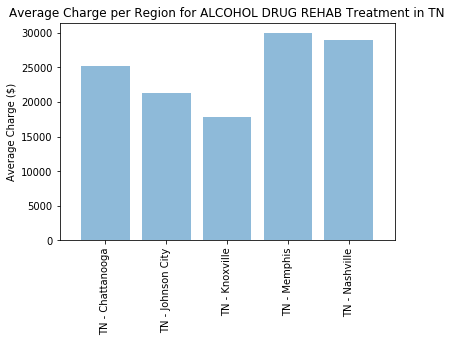

In [57]:
# Create a Bar Chart of the Average Charge per Region for ALCOHOL_DRUG_REHABPROCEDURES in TN

drg_ALCOHOL_DRUG_REHAB_TN_Average_Covered_Charge_List_Values = drg_ALCOHOL_DRUG_REHAB_TN_Average_Covered_Charge_List
drg_ALCOHOL_DRUG_REHAB_TN_Region_List_Values = drg_ALCOHOL_DRUG_REHAB_TN_Region_List
x_axis = np.arange(len(drg_ALCOHOL_DRUG_REHAB_TN_Region_List))

plt.bar(x_axis, drg_ALCOHOL_DRUG_REHAB_TN_Average_Covered_Charge_List_Values, alpha=0.5, align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drg_ALCOHOL_DRUG_REHAB_TN_Region_List_Values, rotation="vertical")

plt.xlim(-0.75, len(x_axis)-0.25)

plt.title("Average Charge per Region for ALCOHOL DRUG REHAB Treatment in TN")
plt.ylabel("Average Charge ($)")


In [58]:
# Filter the data so that only a specific procedure in Nashville TN is in the dataframe

DataFrame_drg_ALCOHOL_DRUG_REHAB_TN_Nashville = DataFrame.loc[(DataFrame["drg_definition"] == "897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REHABILITATION THERAPY W/O MCC") & (DataFrame["provider_state"] == "TN") & (DataFrame["hospital_referral_region"] == "TN - Nashville"),:]

DataFrame_drg_ALCOHOL_DRUG_REHAB_TN_Nashville.head()


,drg_definition,provider_id,provider_name,provider_street_address,provider_city,provider_state,provider_zip_code,hospital_referral_region,total_discharges,average_covered_charges,average_total_payments,average_medicare_payments
162489,897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REH...,440006,TRISTAR SKYLINE MEDICAL CENTER,3441 DICKERSON PIKE,NASHVILLE,TN,37207,TN - Nashville,63,37097.46032,5015.206349,3797.333333
163111,897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REH...,440020,SOUTHERN TENNESSEE REGIONAL HEALTH SYSTEM PULASKI,1265 E COLLEGE ST,PULASKI,TN,38478,TN - Nashville,65,16710.32308,5378.107692,4372.692308
163653,897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REH...,440039,VANDERBILT UNIVERSITY MEDICAL CENTER,1211 MEDICAL CENTER DRIVE,NASHVILLE,TN,37232,TN - Nashville,13,27674.69231,7717.769231,5742.384615
165933,897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REH...,440133,SAINT THOMAS MIDTOWN HOSPITAL,2000 CHURCH ST,NASHVILLE,TN,37236,TN - Nashville,13,19154.38462,5136.153846,3658.769231
166078,897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REH...,440150,TRISTAR SUMMIT MEDICAL CENTER,5655 FRIST BLVD,HERMITAGE,TN,37076,TN - Nashville,16,44361.93750,4556.625,3358.750000


In [59]:
# Display a statistical overview of the ALCOHOL_DRUG_REHABPROCEDURES Nashville TN DataFrame for reference

DataFrame_drg_ALCOHOL_DRUG_REHAB_TN_Nashville.describe()



,total_discharges,average_covered_charges,average_medicare_payments
count,5.000000,5.000000,5.000000
mean,34.000000,28999.759566,4185.985897
std,27.422618,11739.747959,944.796765
min,13.000000,16710.323080,3358.750000
25%,13.000000,19154.384620,3658.769231
50%,16.000000,27674.692310,3797.333333
75%,63.000000,37097.460320,4372.692308
max,65.000000,44361.937500,5742.384615


In [60]:
# Calculate the Number of Unique Providers that serviced DRG ALCOHOL_DRUG_REHABPROCEDURES in Nashville TN
Unique_Provider_count_drg_ALCOHOL_DRUG_REHAB_TN_Nashville = len(DataFrame_drg_ALCOHOL_DRUG_REHAB_TN_Nashville["provider_id"].unique())
Unique_Provider_count_drg_ALCOHOL_DRUG_REHAB_TN_Nashville

# Calculate the Total Number of Discharges for DRG ALCOHOL_DRUG_REHABPROCEDURES in Nasvhville TN
Discharge_Count_drg_ALCOHOL_DRUG_REHAB_TN_Nashville = (DataFrame_drg_ALCOHOL_DRUG_REHAB_TN_Nashville["total_discharges"].sum())
Discharge_Count_drg_ALCOHOL_DRUG_REHAB_TN_Nashville

# Cacluate the average covered charges for DRG ALCOHOL_DRUG_REHABPROCEDURES in Nashville TN
Average_Covered_Charges_drg_ALCOHOL_DRUG_REHAB_TN_Nashville = DataFrame_drg_ALCOHOL_DRUG_REHAB_TN_Nashville["average_covered_charges"].mean()
Average_Covered_Charges_drg_ALCOHOL_DRUG_REHAB_TN_Nashville

# Cacluate the min covered charge amount for DRG ALCOHOL_DRUG_REHABPROCEDURES in Nashville TN
Min_Covered_Charges_drg_ALCOHOL_DRUG_REHAB_TN_Nashville = DataFrame_drg_ALCOHOL_DRUG_REHAB_TN_Nashville["average_covered_charges"].min()
Min_Covered_Charges_drg_ALCOHOL_DRUG_REHAB_TN_Nashville

# Cacluate the max covered charge amount for DRG ALCOHOL_DRUG_REHABPROCEDURES in Nashville TN
Max_Covered_Charges_drg_ALCOHOL_DRUG_REHAB_TN_Nashville = DataFrame_drg_ALCOHOL_DRUG_REHAB_TN_Nashville["average_covered_charges"].max()
Max_Covered_Charges_drg_ALCOHOL_DRUG_REHAB_TN_Nashville

# Calculate the Total Number of Unique Provider Zip Codes that serviced DRG ALCOHOL_DRUG_REHABPROCEDURES in Nashville TN
Unique_Provider_ZipCode_Count_drg_ALCOHOL_DRUG_REHAB_TN_Nashville = len(DataFrame_drg_ALCOHOL_DRUG_REHAB_TN_Nashville["provider_zip_code"].unique())
Unique_Provider_ZipCode_Count_drg_ALCOHOL_DRUG_REHAB_TN_Nashville

# Create a summary data frame to hold the DRG ALCOHOL_DRUG_REHABPROCEDURES in Nashville TN Analysis Results

DRG_Analysis_df_drg_ALCOHOL_DRUG_REHAB_TN_Nashville = pd.DataFrame([
    {"Unique Providers that serviced DRG ALCOHOL_DRUG_REHABPROCEDURES in Nashville TN": Unique_Provider_count_drg_ALCOHOL_DRUG_REHAB_TN_Nashville, 
     "Unique Provider Zip Codes that serviced DRG ALCOHOL_DRUG_REHABPROCEDURES in Nashville TN": Unique_Provider_ZipCode_Count_drg_ALCOHOL_DRUG_REHAB_TN_Nashville, 
     "Total Number of Discharges for DRG ALCOHOL_DRUG_REHABPROCEDURES in Nashville TN": Discharge_Count_drg_ALCOHOL_DRUG_REHAB_TN_Nashville,
     "Average Charge for DRG ALCOHOL_DRUG_REHABPROCEDURES in Nashville TN": Average_Covered_Charges_drg_ALCOHOL_DRUG_REHAB_TN_Nashville,
     "Max Charge for DRG ALCOHOL_DRUG_REHABPROCEDURES in Nashville TN": Max_Covered_Charges_drg_ALCOHOL_DRUG_REHAB_TN_Nashville,
     "Min Charge for DRG ALCOHOL_DRUG_REHABPROCEDURES in Nashville TN": Min_Covered_Charges_drg_ALCOHOL_DRUG_REHAB_TN_Nashville
    }
])
DRG_Analysis_df_drg_ALCOHOL_DRUG_REHAB_TN_Nashville


,Unique Providers that serviced DRG ALCOHOL_DRUG_REHABPROCEDURES in Nashville TN,Unique Provider Zip Codes that serviced DRG ALCOHOL_DRUG_REHABPROCEDURES in Nashville TN,Total Number of Discharges for DRG ALCOHOL_DRUG_REHABPROCEDURES in Nashville TN,Average Charge for DRG ALCOHOL_DRUG_REHABPROCEDURES in Nashville TN,Max Charge for DRG ALCOHOL_DRUG_REHABPROCEDURES in Nashville TN,Min Charge for DRG ALCOHOL_DRUG_REHABPROCEDURES in Nashville TN
0,5,5,170,28999.759566,44361.9375,16710.32308


In [61]:
# Give the displayed data to hold the DRG ALCOHOL_DRUG_REHABPROCEDURES in Nasvhille TN Analysis Results with cleaner formatting

DRG_Analysis_Formatted_df_drg_ALCOHOL_DRUG_REHAB_TN_Nashville = DRG_Analysis_df_drg_ALCOHOL_DRUG_REHAB_TN_Nashville

DRG_Analysis_Formatted_df_drg_ALCOHOL_DRUG_REHAB_TN_Nashville["Average Charge for DRG ALCOHOL_DRUG_REHABPROCEDURES in Nashville TN"] = DRG_Analysis_df_drg_ALCOHOL_DRUG_REHAB_TN_Nashville["Average Charge for DRG ALCOHOL_DRUG_REHABPROCEDURES in Nashville TN"].map("${:,.2f}".format)
DRG_Analysis_Formatted_df_drg_ALCOHOL_DRUG_REHAB_TN_Nashville["Max Charge for DRG ALCOHOL_DRUG_REHABPROCEDURES in Nashville TN"] = DRG_Analysis_df_drg_ALCOHOL_DRUG_REHAB_TN_Nashville["Max Charge for DRG ALCOHOL_DRUG_REHABPROCEDURES in Nashville TN"].map("${:,.2f}".format)
DRG_Analysis_Formatted_df_drg_ALCOHOL_DRUG_REHAB_TN_Nashville["Min Charge for DRG ALCOHOL_DRUG_REHABPROCEDURES in Nashville TN"] = DRG_Analysis_df_drg_ALCOHOL_DRUG_REHAB_TN_Nashville["Min Charge for DRG ALCOHOL_DRUG_REHABPROCEDURES in Nashville TN"].map("${:,.2f}".format)

DRG_Analysis_Formatted_df_drg_ALCOHOL_DRUG_REHAB_TN_Nashville


,Unique Providers that serviced DRG ALCOHOL_DRUG_REHABPROCEDURES in Nashville TN,Unique Provider Zip Codes that serviced DRG ALCOHOL_DRUG_REHABPROCEDURES in Nashville TN,Total Number of Discharges for DRG ALCOHOL_DRUG_REHABPROCEDURES in Nashville TN,Average Charge for DRG ALCOHOL_DRUG_REHABPROCEDURES in Nashville TN,Max Charge for DRG ALCOHOL_DRUG_REHABPROCEDURES in Nashville TN,Min Charge for DRG ALCOHOL_DRUG_REHABPROCEDURES in Nashville TN
0,5,5,170,"$28,999.76","$44,361.94","$16,710.32"


In [62]:
# Create list to store data of the Providers in Nashville for the specific procedure

drg_ALCOHOL_DRUG_REHAB_TN_Nashville_ProviderList = []

for Provider in DataFrame_drg_ALCOHOL_DRUG_REHAB_TN_Nashville["provider_name"]:
    if Provider not in drg_ALCOHOL_DRUG_REHAB_TN_Nashville_ProviderList:
        drg_ALCOHOL_DRUG_REHAB_TN_Nashville_ProviderList.append(Provider)
        
drg_ALCOHOL_DRUG_REHAB_TN_Nashville_ProviderList


['TRISTAR SKYLINE MEDICAL CENTER',
 'SOUTHERN TENNESSEE REGIONAL HEALTH SYSTEM PULASKI',
 'VANDERBILT UNIVERSITY MEDICAL CENTER',
 'SAINT THOMAS MIDTOWN HOSPITAL',
 'TRISTAR SUMMIT MEDICAL CENTER']

In [63]:
# Create list to store data of the Average Charge in Nashville for the specific procedure

drg_ALCOHOL_DRUG_REHAB_TN_Nashville_Average_Covered_Charge_List = []

for Charge in DataFrame_drg_ALCOHOL_DRUG_REHAB_TN_Nashville["average_covered_charges"]:
    if Charge not in drg_ALCOHOL_DRUG_REHAB_TN_Nashville_Average_Covered_Charge_List:
        drg_ALCOHOL_DRUG_REHAB_TN_Nashville_Average_Covered_Charge_List.append(Charge)
        
drg_ALCOHOL_DRUG_REHAB_TN_Nashville_Average_Covered_Charge_List


[37097.46032,
 16710.323080000002,
 27674.692310000002,
 19154.384619999997,
 44361.9375]

In [64]:
# Create a DataFrame of the Average Charge of ALCOHOL_DRUG_REHABper Provider in Nashville by merging the lists
Average_Charge_of_ALCOHOL_DRUG_REHAB_per_Provider_Nashvile_df = pd.DataFrame({
    "DRG": "897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REHABILITATION THERAPY W/O MCC",
    "Provider": drg_ALCOHOL_DRUG_REHAB_TN_Nashville_ProviderList,
    "Average Charge": drg_ALCOHOL_DRUG_REHAB_TN_Nashville_Average_Covered_Charge_List
})
Average_Charge_of_ALCOHOL_DRUG_REHAB_per_Provider_Nashvile_df


,DRG,Provider,Average Charge
0,897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REH...,TRISTAR SKYLINE MEDICAL CENTER,37097.46032
1,897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REH...,SOUTHERN TENNESSEE REGIONAL HEALTH SYSTEM PULASKI,16710.32308
2,897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REH...,VANDERBILT UNIVERSITY MEDICAL CENTER,27674.69231
3,897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REH...,SAINT THOMAS MIDTOWN HOSPITAL,19154.38462
4,897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REH...,TRISTAR SUMMIT MEDICAL CENTER,44361.93750


Text(0, 0.5, 'Average Charge ($)')

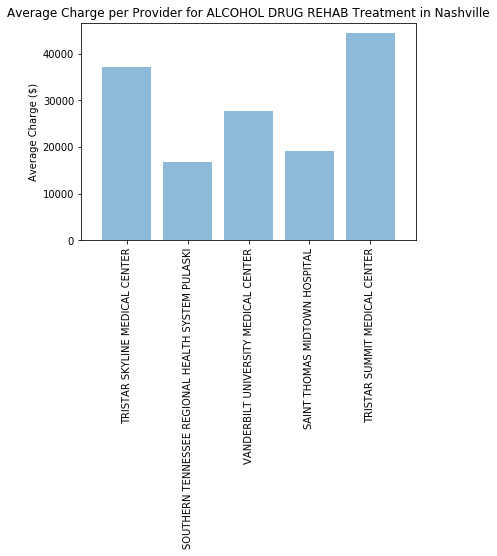

In [65]:
# Create a Bar Chart

AverageChargeValue = drg_ALCOHOL_DRUG_REHAB_TN_Nashville_Average_Covered_Charge_List
ProviderValues = drg_ALCOHOL_DRUG_REHAB_TN_Nashville_ProviderList
x_axis = np.arange(len(drg_ALCOHOL_DRUG_REHAB_TN_Nashville_ProviderList))

plt.bar(x_axis, AverageChargeValue, alpha=0.5, align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ProviderValues, rotation="vertical")

plt.xlim(-0.75, len(x_axis)-0.25)

plt.title("Average Charge per Provider for ALCOHOL DRUG REHAB Treatment in Nashville")
plt.ylabel("Average Charge ($)")


In [66]:
# Store the Average Charge Data for the specific procedure Grouped by State by splitting up the data into groups based upon 'State'
# Filter the DataFrame down only to those columns to chart
Average_ALCOHOL_DRUG_REHAB_Charge_for_data_grouped_by_State = DataFrame_drg_ALCOHOL_DRUG_REHAB.groupby(['provider_state'])

# # Convert to DataFrame

Average_ALCOHOL_DRUG_REHAB_Charge_for_data_grouped_by_State_df = Average_ALCOHOL_DRUG_REHAB_Charge_for_data_grouped_by_State[["average_covered_charges"]].mean().reset_index()

# Preview DataFrame

Average_ALCOHOL_DRUG_REHAB_Charge_for_data_grouped_by_State_df.head()


,provider_state,average_covered_charges
0,AK,28606.454550
1,AL,17765.789165
2,AR,13318.304756
3,AZ,28872.481277
4,CA,52638.259567


In [67]:
# Create list to store data of the States for the specific procedure

drg_ALCOHOL_DRUG_REHAB_State_List = []

for State in Average_ALCOHOL_DRUG_REHAB_Charge_for_data_grouped_by_State_df["provider_state"]:
    if State not in drg_ALCOHOL_DRUG_REHAB_State_List:
        drg_ALCOHOL_DRUG_REHAB_State_List.append(State)
        
drg_ALCOHOL_DRUG_REHAB_State_List


['AK',
 'AL',
 'AR',
 'AZ',
 'CA',
 'CO',
 'CT',
 'DC',
 'DE',
 'FL',
 'GA',
 'HI',
 'IA',
 'ID',
 'IL',
 'IN',
 'KS',
 'KY',
 'LA',
 'MA',
 'MD',
 'ME',
 'MI',
 'MN',
 'MO',
 'MS',
 'MT',
 'NC',
 'ND',
 'NE',
 'NH',
 'NJ',
 'NM',
 'NV',
 'NY',
 'OH',
 'OK',
 'OR',
 'PA',
 'RI',
 'SC',
 'SD',
 'TN',
 'TX',
 'UT',
 'VA',
 'VT',
 'WA',
 'WI',
 'WV',
 'WY']

In [68]:
# Create list to store data of the Average Charge by State for the specific procedure

drg_ALCOHOL_DRUG_REHAB_Average_Covered_Charge_by_State_List = []

for Charge in Average_ALCOHOL_DRUG_REHAB_Charge_for_data_grouped_by_State_df["average_covered_charges"]:
    if Charge not in drg_ALCOHOL_DRUG_REHAB_Average_Covered_Charge_by_State_List:
        drg_ALCOHOL_DRUG_REHAB_Average_Covered_Charge_by_State_List.append(Charge)
        
drg_ALCOHOL_DRUG_REHAB_Average_Covered_Charge_by_State_List


[28606.45455,
 17765.78916547619,
 13318.3047564,
 28872.4812775,
 52638.25956725805,
 37007.667197999996,
 24384.355824705883,
 26659.887026333337,
 20730.44603,
 35946.52057672131,
 20806.385648578947,
 12736.58502,
 15589.59656575,
 17004.24155,
 22752.52992751923,
 18423.01911604762,
 31283.12599833333,
 14536.361709133334,
 20842.567629333334,
 14361.708064394736,
 8023.00035685714,
 21021.70140725,
 17284.766615656248,
 19808.403651736844,
 17013.898778478262,
 20478.269766230773,
 13130.161110000001,
 18896.27599525,
 18232.11727,
 16865.071966666666,
 21679.525924999998,
 49432.98862533334,
 18401.047300000002,
 47539.955235,
 28470.553468971008,
 18958.529404375007,
 19446.192047875,
 20990.202236666668,
 31721.843659685725,
 17855.519925,
 31740.95735,
 18087.504764333335,
 25954.131594615385,
 27723.422413391298,
 21175.35471,
 19769.65926061905,
 15744.52083,
 26619.30825529412,
 16455.708617666667,
 17463.8732186,
 19907.08333]

In [69]:
# Create a DataFrame of the Average Charge by State for the specific procedure by merging the lists
Average_Charge_of_ALCOHOL_DRUG_REHAB_per_State = pd.DataFrame({
    "DRG": "897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REHABILITATION THERAPY W/O MCC",
    "State": drg_ALCOHOL_DRUG_REHAB_State_List,
    "Average Charge": drg_ALCOHOL_DRUG_REHAB_Average_Covered_Charge_by_State_List
})
Average_Charge_of_ALCOHOL_DRUG_REHAB_per_State


,DRG,State,Average Charge
0,897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REH...,AK,28606.454550
1,897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REH...,AL,17765.789165
2,897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REH...,AR,13318.304756
3,897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REH...,AZ,28872.481277
4,897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REH...,CA,52638.259567
5,897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REH...,CO,37007.667198
6,897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REH...,CT,24384.355825
7,897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REH...,DC,26659.887026
8,897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REH...,DE,20730.446030
9,897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REH...,FL,35946.520577


Text(0, 0.5, 'Average Charge ($)')

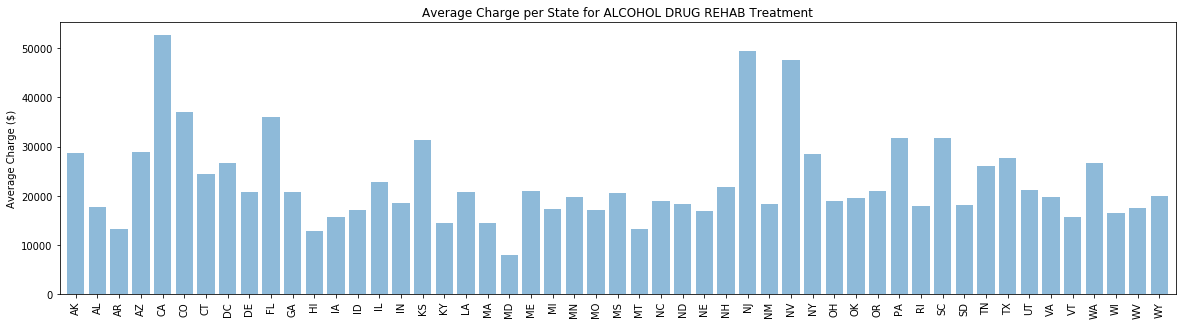

In [70]:
# Create a Bar Chart of the Average Charge per State for ALCOHOL_DRUG_REHABPROCEDURES

drg_ALCOHOL_DRUG_REHAB_Average_Covered_Charge_by_State_List_Values = drg_ALCOHOL_DRUG_REHAB_Average_Covered_Charge_by_State_List
drg_ALCOHOL_DRUG_REHAB_State_List_Values = drg_ALCOHOL_DRUG_REHAB_State_List
x_axis = np.arange(len(drg_ALCOHOL_DRUG_REHAB_State_List))

plt.figure(figsize=(20,5))
plt.bar(x_axis, drg_ALCOHOL_DRUG_REHAB_Average_Covered_Charge_by_State_List_Values, alpha=0.5, align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drg_ALCOHOL_DRUG_REHAB_State_List_Values, rotation="vertical")

plt.xlim(-0.75, len(x_axis)-0.25)

plt.title("Average Charge per State for ALCOHOL DRUG REHAB Treatment")
plt.ylabel("Average Charge ($)")


In [71]:
# Store the Total Discharge Volume Data for the specific procedure Grouped by Provider by splitting up the data into groups based upon 'Provider'
# Filter the DataFrame down only to those columns to chart
ALCOHOL_DRUG_REHAB_data_grouped_by_Provider = DataFrame_drg_ALCOHOL_DRUG_REHAB.groupby(['provider_name'])

# # Convert to DataFrame

ALCOHOL_DRUG_REHAB_Total_Discharge_Volume_for_data_grouped_by_Provider_df = ALCOHOL_DRUG_REHAB_data_grouped_by_Provider[["total_discharges"]].sum().reset_index()

# Preview DataFrame

ALCOHOL_DRUG_REHAB_Total_Discharge_Volume_for_data_grouped_by_Provider_df.head()


,provider_name,total_discharges
0,ABBOTT NORTHWESTERN HOSPITAL,35
1,ABINGTON MEMORIAL HOSPITAL,26
2,ADCARE HOSPITAL OF WORCESTER INC,1446
3,ADENA REGIONAL MEDICAL CENTER,14
4,ADVENTIST HEALTH CASTLE,13


In [72]:
# Store the Average Charge Data for the specific procedure Grouped by Provider 
# Filter the DataFrame down only to those columns to chart

ALCOHOL_DRUG_REHAB_Average_Charge_for_data_grouped_by_Provider_df = ALCOHOL_DRUG_REHAB_data_grouped_by_Provider[["average_covered_charges"]].mean().reset_index()

# Preview DataFrame

ALCOHOL_DRUG_REHAB_Average_Charge_for_data_grouped_by_Provider_df.head()


,provider_name,average_covered_charges
0,ABBOTT NORTHWESTERN HOSPITAL,21803.285710
1,ABINGTON MEMORIAL HOSPITAL,34387.153850
2,ADCARE HOSPITAL OF WORCESTER INC,5735.925311
3,ADENA REGIONAL MEDICAL CENTER,20027.285710
4,ADVENTIST HEALTH CASTLE,10784.538460


# DRUG POISONING

In [73]:
# Filter the data so that only a specific procedure is in the dataframe

DataFrame_drg_DRUG_POISONING= DataFrame.loc[DataFrame["drg_definition"] == "918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC", :]

DataFrame_drg_DRUG_POISONING.head()


,drg_definition,provider_id,provider_name,provider_street_address,provider_city,provider_state,provider_zip_code,hospital_referral_region,total_discharges,average_covered_charges,average_total_payments,average_medicare_payments
151,918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,21,19832.71429,4047.952381,3046.619048
228,918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,30,10599.76667,4084.3,3028.733333
342,918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,29,14272.06897,3679.689655,2777.896552
549,918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,26683.77778,4323.333333,3180.166667
603,918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC,10019,HELEN KELLER MEMORIAL HOSPITAL,1300 SOUTH MONTGOMERY AVENUE,SHEFFIELD,AL,35660,AL - Birmingham,15,15478.13333,3875.266667,2828.066667


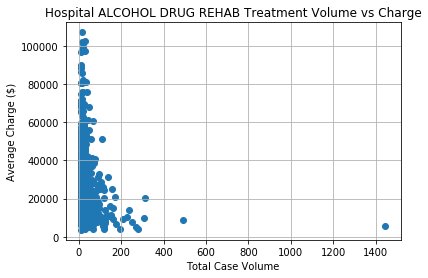

In [74]:
# Build a scatter plot for Total Discharge Volume vs Price
plt.scatter(ALCOHOL_DRUG_REHAB_Total_Discharge_Volume_for_data_grouped_by_Provider_df["total_discharges"], ALCOHOL_DRUG_REHAB_Average_Charge_for_data_grouped_by_Provider_df["average_covered_charges"], marker="o")

# Incorporate the other graph properties
plt.title("Hospital ALCOHOL DRUG REHAB Treatment Volume vs Charge")
plt.ylabel("Average Charge ($)")
plt.xlabel("Total Case Volume")
plt.grid(True)


In [75]:
# Display a statistical overview of the DRUG_POISONINGPROCEDURES DataFrame for reference

DataFrame_drg_DRUG_POISONING.describe()


,total_discharges,average_covered_charges,average_medicare_payments
count,671.000000,671.000000,671.000000
mean,17.915052,26007.136502,4609.275148
std,8.003186,13766.795455,1643.085881
min,11.000000,5482.944444,2284.909091
25%,12.000000,16003.185315,3561.644927
50%,15.000000,22469.264710,4142.166667
75%,20.000000,33433.000000,5221.508741
max,76.000000,79734.100000,13146.545460


In [76]:
# Calculate the Number of Unique Providers that serviced DRG DRUG_POISONINGPROCEDURES
Unique_Provider_count_drg_DRUG_POISONING= len(DataFrame_drg_DRUG_POISONING["provider_id"].unique())
Unique_Provider_count_drg_DRUG_POISONING

# Calculate the Unique Number of hospital_referral_region_description that serviced DRG DRUG_POISONINGPROCEDURES in the DataFrame
Unique_Hospital_Referral_Region_count_drg_DRUG_POISONING= len(DataFrame_drg_DRUG_POISONING["hospital_referral_region"].unique())
Unique_Hospital_Referral_Region_count_drg_DRUG_POISONING

# Calculate the Total Number of Discharges for DRG DRUG_POISONINGPROCEDURES in the DataFrame
Discharge_Count_drg_DRUG_POISONING= (DataFrame_drg_DRUG_POISONING["total_discharges"].sum())
Discharge_Count_drg_DRUG_POISONING

# Cacluate the average covered charges for DRG DRUG_POISONINGPROCEDURES
Average_Covered_Charges_drg_DRUG_POISONING= DataFrame_drg_DRUG_POISONING["average_covered_charges"].mean()
Average_Covered_Charges_drg_DRUG_POISONING
# Cacluate the max covered charge amount for DRG DRUG_POISONINGPROCEDURES
Max_Covered_Charges_drg_DRUG_POISONING= DataFrame_drg_DRUG_POISONING["average_covered_charges"].max()
Max_Covered_Charges_drg_DRUG_POISONING

# Cacluate the min covered charge amount for DRG DRUG_POISONINGPROCEDURES
Min_Covered_Charges_drg_DRUG_POISONING= DataFrame_drg_DRUG_POISONING["average_covered_charges"].min()
Min_Covered_Charges_drg_DRUG_POISONING

# Calculate the Total Number of Unique Provider Zip Codes that serviced DRG DRUG_POISONINGPROCEDURES
Unique_Provider_ZipCode_Count_drg_DRUG_POISONING= len(DataFrame_drg_DRUG_POISONING["provider_zip_code"].unique())
Unique_Provider_ZipCode_Count_drg_DRUG_POISONING

# Create a summary data frame to hold the DRG DRUG_POISONINGPROCEDURES Analysis Results

DRG_Analysis_df_drg_DRUG_POISONING= pd.DataFrame([
    {"Unique Providers that serviced DRG DRUG_POISONINGPROCEDURES": Unique_Provider_count_drg_DRUG_POISONING, 
     "Unique Provider Zip Codes that serviced DRG DRUG_POISONINGPROCEDURES": Unique_Provider_ZipCode_Count_drg_DRUG_POISONING, 
     "Total Number of Discharges for DRG DRUG_POISONINGPROCEDURES": Discharge_Count_drg_DRUG_POISONING,
     "Average Charge for DRG DRUG_POISONINGPROCEDURES": Average_Covered_Charges_drg_DRUG_POISONING,
     "Max Charge for DRG DRUG_POISONINGPROCEDURES": Max_Covered_Charges_drg_DRUG_POISONING,
     "Min Charge for DRG DRUG_POISONINGPROCEDURES": Min_Covered_Charges_drg_DRUG_POISONING
    }
])
DRG_Analysis_df_drg_DRUG_POISONING
# Give the displayed data to hold the DRG DRUG_POISONINGPROCEDURES Analysis Results with cleaner formatting



,Unique Providers that serviced DRG DRUG_POISONINGPROCEDURES,Unique Provider Zip Codes that serviced DRG DRUG_POISONINGPROCEDURES,Total Number of Discharges for DRG DRUG_POISONINGPROCEDURES,Average Charge for DRG DRUG_POISONINGPROCEDURES,Max Charge for DRG DRUG_POISONINGPROCEDURES,Min Charge for DRG DRUG_POISONINGPROCEDURES
0,671,649,12021,26007.136502,79734.1,5482.944444


In [77]:
# Give the displayed data to hold the DRG DRUG_POISONINGPROCEDURES Analysis Results with cleaner formatting

DRG_Analysis_Formatted_df_drg_DRUG_POISONING= DRG_Analysis_df_drg_DRUG_POISONING

DRG_Analysis_Formatted_df_drg_DRUG_POISONING["Average Charge for DRG DRUG_POISONINGPROCEDURES"] = DRG_Analysis_df_drg_DRUG_POISONING["Average Charge for DRG DRUG_POISONINGPROCEDURES"].map("${:,.2f}".format)
DRG_Analysis_Formatted_df_drg_DRUG_POISONING["Max Charge for DRG DRUG_POISONINGPROCEDURES"] = DRG_Analysis_df_drg_DRUG_POISONING["Max Charge for DRG DRUG_POISONINGPROCEDURES"].map("${:,.2f}".format)
DRG_Analysis_Formatted_df_drg_DRUG_POISONING["Min Charge for DRG DRUG_POISONINGPROCEDURES"] = DRG_Analysis_df_drg_DRUG_POISONING["Min Charge for DRG DRUG_POISONINGPROCEDURES"].map("${:,.2f}".format)

DRG_Analysis_Formatted_df_drg_DRUG_POISONING


,Unique Providers that serviced DRG DRUG_POISONINGPROCEDURES,Unique Provider Zip Codes that serviced DRG DRUG_POISONINGPROCEDURES,Total Number of Discharges for DRG DRUG_POISONINGPROCEDURES,Average Charge for DRG DRUG_POISONINGPROCEDURES,Max Charge for DRG DRUG_POISONINGPROCEDURES,Min Charge for DRG DRUG_POISONINGPROCEDURES
0,671,649,12021,"$26,007.14","$79,734.10","$5,482.94"


In [78]:
# Filter the data so that only a specific procedure in TN is in the dataframe

DataFrame_drg_DRUG_POISONING_TN = DataFrame.loc[(DataFrame["drg_definition"] == "918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC") & (DataFrame["provider_state"] == "TN"), :]

DataFrame_drg_DRUG_POISONING_TN.head()


,drg_definition,provider_id,provider_name,provider_street_address,provider_city,provider_state,provider_zip_code,hospital_referral_region,total_discharges,average_covered_charges,average_total_payments,average_medicare_payments
162332,918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC,440002,JACKSON-MADISON COUNTY GENERAL HOSPITAL,620 SKYLINE DRIVE,JACKSON,TN,38301,TN - Jackson,28,12119.14286,4337.535714,3339.107143
162398,918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC,440003,SUMNER REGIONAL MEDICAL CENTER,555 HARTSVILLE PIKE,GALLATIN,TN,37066,TN - Nashville,12,23777.58333,4193.75,3184.083333
162491,918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC,440006,TRISTAR SKYLINE MEDICAL CENTER,3441 DICKERSON PIKE,NASHVILLE,TN,37207,TN - Nashville,17,36282.88235,4578,3578.235294
163072,918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC,440017,WELLMONT HOLSTON VALLEY MEDICAL CENTER,130 WEST RAVINE ROAD,KINGSPORT,TN,37662,TN - Kingsport,14,25831.50000,5236.642857,3829.785714
163412,918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC,440035,TENNOVA HEALTHCARE-CLARKSVILLE,651 DUNLOP LANE,CLARKSVILLE,TN,37040,TN - Nashville,11,24900.18182,4438.818182,3252.636364


In [79]:
# Display a statistical overview of the DRUG_POISONINGPROCEDURES TN DataFrame for reference

DataFrame_drg_DRUG_POISONING_TN.describe()


,total_discharges,average_covered_charges,average_medicare_payments
count,19.000000,19.000000,19.000000
mean,15.473684,23216.761802,3504.124073
std,5.975584,8419.298981,700.186743
min,11.000000,9758.000000,2407.818182
25%,12.000000,17224.653030,3207.772436
50%,13.000000,23273.312500,3393.076923
75%,16.500000,27802.223685,3744.662088
max,33.000000,39630.846150,5523.800000


In [80]:
# Calculate the Number of Unique Providers that serviced DRG DRUG_POISONINGPROCEDURES in TN
Unique_Provider_count_drg_DRUG_POISONING_TN = len(DataFrame_drg_DRUG_POISONING_TN["provider_id"].unique())
Unique_Provider_count_drg_DRUG_POISONING_TN

# Calculate the Unique Number of hospital_referral_region_description that serviced DRG DRUG_POISONINGPROCEDURES in TN
Unique_Hospital_Referral_Region_count_drg_DRUG_POISONING_TN = len(DataFrame_drg_DRUG_POISONING_TN["hospital_referral_region"].unique())
Unique_Hospital_Referral_Region_count_drg_DRUG_POISONING_TN

# Calculate the Total Number of Discharges for DRG DRUG_POISONINGPROCEDURES in TN
Discharge_Count_drg_DRUG_POISONING_TN = (DataFrame_drg_DRUG_POISONING_TN["total_discharges"].sum())
Discharge_Count_drg_DRUG_POISONING_TN

# Cacluate the average covered charges for DRG DRUG_POISONINGPROCEDURES in TN
Average_Covered_Charges_drg_DRUG_POISONING_TN = DataFrame_drg_DRUG_POISONING_TN["average_covered_charges"].mean()
Average_Covered_Charges_drg_DRUG_POISONING_TN

# Cacluate the min covered charge amount for DRG DRUG_POISONINGPROCEDURES in TN
Min_Covered_Charges_drg_DRUG_POISONING_TN = DataFrame_drg_DRUG_POISONING_TN["average_covered_charges"].min()
Min_Covered_Charges_drg_DRUG_POISONING_TN

# Cacluate the max covered charge amount for DRG DRUG_POISONINGPROCEDURES in TN
Max_Covered_Charges_drg_DRUG_POISONING_TN = DataFrame_drg_DRUG_POISONING_TN["average_covered_charges"].max()
Max_Covered_Charges_drg_DRUG_POISONING_TN

# Calculate the Total Number of Unique Provider Zip Codes that serviced DRG DRUG_POISONINGPROCEDURES in TN
Unique_Provider_ZipCode_Count_drg_DRUG_POISONING_TN = len(DataFrame_drg_DRUG_POISONING_TN["provider_zip_code"].unique())
Unique_Provider_ZipCode_Count_drg_DRUG_POISONING_TN

# Create a summary data frame to hold the DRG DRUG_POISONINGPROCEDURES in TN Analysis Results

DRG_Analysis_df_drg_DRUG_POISONING_TN = pd.DataFrame([
    {"Unique Providers that serviced DRG DRUG_POISONINGPROCEDURES in TN": Unique_Provider_count_drg_DRUG_POISONING_TN, 
     "Unique Provider Zip Codes that serviced DRG DRUG_POISONINGPROCEDURES in TN": Unique_Provider_ZipCode_Count_drg_DRUG_POISONING_TN, 
     "Total Number of Discharges for DRG DRUG_POISONINGPROCEDURES in TN": Discharge_Count_drg_DRUG_POISONING_TN,
     "Average Charge for DRG DRUG_POISONINGPROCEDURES in TN": Average_Covered_Charges_drg_DRUG_POISONING_TN,
     "Max Charge for DRG DRUG_POISONINGPROCEDURES in TN": Max_Covered_Charges_drg_DRUG_POISONING_TN,
     "Min Charge for DRG DRUG_POISONINGPROCEDURES in TN": Min_Covered_Charges_drg_DRUG_POISONING_TN
    }
])
DRG_Analysis_df_drg_DRUG_POISONING_TN


,Unique Providers that serviced DRG DRUG_POISONINGPROCEDURES in TN,Unique Provider Zip Codes that serviced DRG DRUG_POISONINGPROCEDURES in TN,Total Number of Discharges for DRG DRUG_POISONINGPROCEDURES in TN,Average Charge for DRG DRUG_POISONINGPROCEDURES in TN,Max Charge for DRG DRUG_POISONINGPROCEDURES in TN,Min Charge for DRG DRUG_POISONINGPROCEDURES in TN
0,19,19,294,23216.761802,39630.84615,9758.0


In [81]:
# Give the displayed data to hold the DRG DRUG_POISONINGPROCEDURES in TN Analysis Results with cleaner formatting

DRG_Analysis_Formatted_df_drg_DRUG_POISONING_TN = DRG_Analysis_df_drg_DRUG_POISONING_TN

DRG_Analysis_Formatted_df_drg_DRUG_POISONING_TN["Average Charge for DRG DRUG_POISONINGPROCEDURES in TN"] = DRG_Analysis_df_drg_DRUG_POISONING_TN["Average Charge for DRG DRUG_POISONINGPROCEDURES in TN"].map("${:,.2f}".format)
DRG_Analysis_Formatted_df_drg_DRUG_POISONING_TN["Max Charge for DRG DRUG_POISONINGPROCEDURES in TN"] = DRG_Analysis_df_drg_DRUG_POISONING_TN["Max Charge for DRG DRUG_POISONINGPROCEDURES in TN"].map("${:,.2f}".format)
DRG_Analysis_Formatted_df_drg_DRUG_POISONING_TN["Min Charge for DRG DRUG_POISONINGPROCEDURES in TN"] = DRG_Analysis_df_drg_DRUG_POISONING_TN["Min Charge for DRG DRUG_POISONINGPROCEDURES in TN"].map("${:,.2f}".format)

DRG_Analysis_Formatted_df_drg_DRUG_POISONING_TN


,Unique Providers that serviced DRG DRUG_POISONINGPROCEDURES in TN,Unique Provider Zip Codes that serviced DRG DRUG_POISONINGPROCEDURES in TN,Total Number of Discharges for DRG DRUG_POISONINGPROCEDURES in TN,Average Charge for DRG DRUG_POISONINGPROCEDURES in TN,Max Charge for DRG DRUG_POISONINGPROCEDURES in TN,Min Charge for DRG DRUG_POISONINGPROCEDURES in TN
0,19,19,294,"$23,216.76","$39,630.85","$9,758.00"


In [82]:
# Store the Average Charge Data for the specific procedure Grouped by Region by splitting up the data into groups based upon 'Region'
# Filter the DataFrame down only to those columns to chart
DRUG_POISONING_data_grouped_by_Region_in_TN = DataFrame_drg_DRUG_POISONING_TN.groupby(['hospital_referral_region'])

# Convert to DataFrame

DRUG_POISONING_Avg_Charge_data_grouped_by_Region_in_TN_df = DRUG_POISONING_data_grouped_by_Region_in_TN[["average_covered_charges"]].mean().reset_index()

# Preview DataFrame

DRUG_POISONING_Avg_Charge_data_grouped_by_Region_in_TN_df.head()


,hospital_referral_region,average_covered_charges
0,TN - Chattanooga,25694.87296
1,TN - Jackson,12119.14286
2,TN - Johnson City,23273.31250
3,TN - Kingsport,25831.50000
4,TN - Memphis,17499.60606


In [83]:
# Create list to store data of the Regions in TN for the specific procedure

drg_DRUG_POISONING_TN_Region_List = []

for Region in DRUG_POISONING_Avg_Charge_data_grouped_by_Region_in_TN_df["hospital_referral_region"]:
    if Region not in drg_DRUG_POISONING_TN_Region_List:
        drg_DRUG_POISONING_TN_Region_List.append(Region)
        
drg_DRUG_POISONING_TN_Region_List


['TN - Chattanooga',
 'TN - Jackson',
 'TN - Johnson City',
 'TN - Kingsport',
 'TN - Memphis',
 'TN - Nashville']

In [84]:
# Create list to store data of the Average Charge by Region in TN for the specific procedure

drg_DRUG_POISONING_TN_Average_Covered_Charge_List = []

for Charge in DRUG_POISONING_Avg_Charge_data_grouped_by_Region_in_TN_df["average_covered_charges"]:
    if Charge not in drg_DRUG_POISONING_TN_Average_Covered_Charge_List:
        drg_DRUG_POISONING_TN_Average_Covered_Charge_List.append(Charge)
        
drg_DRUG_POISONING_TN_Average_Covered_Charge_List


[25694.872959999997,
 12119.14286,
 23273.3125,
 25831.5,
 17499.60606,
 23775.8578275]

In [85]:
# Create a DataFrame of the Average Charge by Region in TN for the specific procedure by merging the lists
Average_Charge_of_DRUG_POISONING_per_Region_TN = pd.DataFrame({
    "DRG": "918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC",
    "Region": drg_DRUG_POISONING_TN_Region_List,
    "Average Charge": drg_DRUG_POISONING_TN_Average_Covered_Charge_List
})
Average_Charge_of_DRUG_POISONING_per_Region_TN


,DRG,Region,Average Charge
0,918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC,TN - Chattanooga,25694.872960
1,918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC,TN - Jackson,12119.142860
2,918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC,TN - Johnson City,23273.312500
3,918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC,TN - Kingsport,25831.500000
4,918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC,TN - Memphis,17499.606060
5,918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC,TN - Nashville,23775.857827


Text(0, 0.5, 'Average Charge ($)')

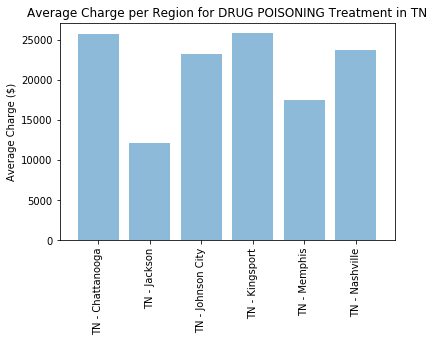

In [86]:
# Create a Bar Chart of the Average Charge per Region for DRUG_POISONINGPROCEDURES in TN

drg_DRUG_POISONING_TN_Average_Covered_Charge_List_Values = drg_DRUG_POISONING_TN_Average_Covered_Charge_List
drg_DRUG_POISONING_TN_Region_List_Values = drg_DRUG_POISONING_TN_Region_List
x_axis = np.arange(len(drg_DRUG_POISONING_TN_Region_List))

plt.bar(x_axis, drg_DRUG_POISONING_TN_Average_Covered_Charge_List_Values, alpha=0.5, align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drg_DRUG_POISONING_TN_Region_List_Values, rotation="vertical")

plt.xlim(-0.75, len(x_axis)-0.25)

plt.title("Average Charge per Region for DRUG POISONING Treatment in TN")
plt.ylabel("Average Charge ($)")


In [87]:
# Filter the data so that only a specific procedure in Nashville TN is in the dataframe

DataFrame_drg_DRUG_POISONING_TN_Nashville = DataFrame.loc[(DataFrame["drg_definition"] == "918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC") & (DataFrame["provider_state"] == "TN") & (DataFrame["hospital_referral_region"] == "TN - Nashville"),:]

DataFrame_drg_DRUG_POISONING_TN_Nashville.head()


,drg_definition,provider_id,provider_name,provider_street_address,provider_city,provider_state,provider_zip_code,hospital_referral_region,total_discharges,average_covered_charges,average_total_payments,average_medicare_payments
162398,918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC,440003,SUMNER REGIONAL MEDICAL CENTER,555 HARTSVILLE PIKE,GALLATIN,TN,37066,TN - Nashville,12,23777.58333,4193.75,3184.083333
162491,918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC,440006,TRISTAR SKYLINE MEDICAL CENTER,3441 DICKERSON PIKE,NASHVILLE,TN,37207,TN - Nashville,17,36282.88235,4578,3578.235294
163412,918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC,440035,TENNOVA HEALTHCARE-CLARKSVILLE,651 DUNLOP LANE,CLARKSVILLE,TN,37040,TN - Nashville,11,24900.18182,4438.818182,3252.636364
163658,918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC,440039,VANDERBILT UNIVERSITY MEDICAL CENTER,1211 MEDICAL CENTER DRIVE,NASHVILLE,TN,37232,TN - Nashville,15,20958.40000,6950.666667,5523.800000
164364,918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC,440053,SAINT THOMAS RUTHERFORD HOSPITAL,1700 MEDICAL CENTER PARKWAY,MURFREESBORO,TN,37129,TN - Nashville,20,16949.70000,4604.1,3417.300000


In [88]:
# Display a statistical overview of the DRUG_POISONINGPROCEDURES Nashville TN DataFrame for reference

DataFrame_drg_DRUG_POISONING_TN_Nashville.describe()


,total_discharges,average_covered_charges,average_medicare_payments
count,12.000000,12.000000,12.000000
mean,13.916667,23775.857827,3418.210174
std,3.146667,8165.762727,730.073612
min,11.000000,9758.000000,2516.416667
25%,11.750000,18195.174998,3151.857954
50%,13.000000,22992.155300,3267.272727
75%,15.500000,30649.460527,3457.533824
max,20.000000,36282.882350,5523.800000


In [89]:
# Calculate the Number of Unique Providers that serviced DRG DRUG_POISONINGPROCEDURES in Nashville TN
Unique_Provider_count_drg_DRUG_POISONING_TN_Nashville = len(DataFrame_drg_DRUG_POISONING_TN_Nashville["provider_id"].unique())
Unique_Provider_count_drg_DRUG_POISONING_TN_Nashville

# Calculate the Total Number of Discharges for DRG DRUG_POISONINGPROCEDURES in Nasvhville TN
Discharge_Count_drg_DRUG_POISONING_TN_Nashville = (DataFrame_drg_DRUG_POISONING_TN_Nashville["total_discharges"].sum())
Discharge_Count_drg_DRUG_POISONING_TN_Nashville

# Cacluate the average covered charges for DRG DRUG_POISONINGPROCEDURES in Nashville TN
Average_Covered_Charges_drg_DRUG_POISONING_TN_Nashville = DataFrame_drg_DRUG_POISONING_TN_Nashville["average_covered_charges"].mean()
Average_Covered_Charges_drg_DRUG_POISONING_TN_Nashville

# Cacluate the min covered charge amount for DRG DRUG_POISONINGPROCEDURES in Nashville TN
Min_Covered_Charges_drg_DRUG_POISONING_TN_Nashville = DataFrame_drg_DRUG_POISONING_TN_Nashville["average_covered_charges"].min()
Min_Covered_Charges_drg_DRUG_POISONING_TN_Nashville

# Cacluate the max covered charge amount for DRG DRUG_POISONINGPROCEDURES in Nashville TN
Max_Covered_Charges_drg_DRUG_POISONING_TN_Nashville = DataFrame_drg_DRUG_POISONING_TN_Nashville["average_covered_charges"].max()
Max_Covered_Charges_drg_DRUG_POISONING_TN_Nashville

# Calculate the Total Number of Unique Provider Zip Codes that serviced DRG DRUG_POISONINGPROCEDURES in Nashville TN
Unique_Provider_ZipCode_Count_drg_DRUG_POISONING_TN_Nashville = len(DataFrame_drg_DRUG_POISONING_TN_Nashville["provider_zip_code"].unique())
Unique_Provider_ZipCode_Count_drg_DRUG_POISONING_TN_Nashville

# Create a summary data frame to hold the DRG DRUG_POISONINGPROCEDURES in Nashville TN Analysis Results

DRG_Analysis_df_drg_DRUG_POISONING_TN_Nashville = pd.DataFrame([
    {"Unique Providers that serviced DRG DRUG_POISONINGPROCEDURES in Nashville TN": Unique_Provider_count_drg_DRUG_POISONING_TN_Nashville, 
     "Unique Provider Zip Codes that serviced DRG DRUG_POISONINGPROCEDURES in Nashville TN": Unique_Provider_ZipCode_Count_drg_DRUG_POISONING_TN_Nashville, 
     "Total Number of Discharges for DRG DRUG_POISONINGPROCEDURES in Nashville TN": Discharge_Count_drg_DRUG_POISONING_TN_Nashville,
     "Average Charge for DRG DRUG_POISONINGPROCEDURES in Nashville TN": Average_Covered_Charges_drg_DRUG_POISONING_TN_Nashville,
     "Max Charge for DRG DRUG_POISONINGPROCEDURES in Nashville TN": Max_Covered_Charges_drg_DRUG_POISONING_TN_Nashville,
     "Min Charge for DRG DRUG_POISONINGPROCEDURES in Nashville TN": Min_Covered_Charges_drg_DRUG_POISONING_TN_Nashville
    }
])
DRG_Analysis_df_drg_DRUG_POISONING_TN_Nashville


,Unique Providers that serviced DRG DRUG_POISONINGPROCEDURES in Nashville TN,Unique Provider Zip Codes that serviced DRG DRUG_POISONINGPROCEDURES in Nashville TN,Total Number of Discharges for DRG DRUG_POISONINGPROCEDURES in Nashville TN,Average Charge for DRG DRUG_POISONINGPROCEDURES in Nashville TN,Max Charge for DRG DRUG_POISONINGPROCEDURES in Nashville TN,Min Charge for DRG DRUG_POISONINGPROCEDURES in Nashville TN
0,12,12,167,23775.857827,36282.88235,9758.0


In [90]:
# Give the displayed data to hold the DRG DRUG_POISONINGPROCEDURES in Nasvhille TN Analysis Results with cleaner formatting

DRG_Analysis_Formatted_df_drg_DRUG_POISONING_TN_Nashville = DRG_Analysis_df_drg_DRUG_POISONING_TN_Nashville

DRG_Analysis_Formatted_df_drg_DRUG_POISONING_TN_Nashville["Average Charge for DRG DRUG_POISONINGPROCEDURES in Nashville TN"] = DRG_Analysis_df_drg_DRUG_POISONING_TN_Nashville["Average Charge for DRG DRUG_POISONINGPROCEDURES in Nashville TN"].map("${:,.2f}".format)
DRG_Analysis_Formatted_df_drg_DRUG_POISONING_TN_Nashville["Max Charge for DRG DRUG_POISONINGPROCEDURES in Nashville TN"] = DRG_Analysis_df_drg_DRUG_POISONING_TN_Nashville["Max Charge for DRG DRUG_POISONINGPROCEDURES in Nashville TN"].map("${:,.2f}".format)
DRG_Analysis_Formatted_df_drg_DRUG_POISONING_TN_Nashville["Min Charge for DRG DRUG_POISONINGPROCEDURES in Nashville TN"] = DRG_Analysis_df_drg_DRUG_POISONING_TN_Nashville["Min Charge for DRG DRUG_POISONINGPROCEDURES in Nashville TN"].map("${:,.2f}".format)

DRG_Analysis_Formatted_df_drg_DRUG_POISONING_TN_Nashville


,Unique Providers that serviced DRG DRUG_POISONINGPROCEDURES in Nashville TN,Unique Provider Zip Codes that serviced DRG DRUG_POISONINGPROCEDURES in Nashville TN,Total Number of Discharges for DRG DRUG_POISONINGPROCEDURES in Nashville TN,Average Charge for DRG DRUG_POISONINGPROCEDURES in Nashville TN,Max Charge for DRG DRUG_POISONINGPROCEDURES in Nashville TN,Min Charge for DRG DRUG_POISONINGPROCEDURES in Nashville TN
0,12,12,167,"$23,775.86","$36,282.88","$9,758.00"


In [91]:
# Create list to store data of the Providers in Nashville for the specific procedure

drg_DRUG_POISONING_TN_Nashville_ProviderList = []

for Provider in DataFrame_drg_DRUG_POISONING_TN_Nashville["provider_name"]:
    if Provider not in drg_DRUG_POISONING_TN_Nashville_ProviderList:
        drg_DRUG_POISONING_TN_Nashville_ProviderList.append(Provider)
        
drg_DRUG_POISONING_TN_Nashville_ProviderList


['SUMNER REGIONAL MEDICAL CENTER',
 'TRISTAR SKYLINE MEDICAL CENTER',
 'TENNOVA HEALTHCARE-CLARKSVILLE',
 'VANDERBILT UNIVERSITY MEDICAL CENTER',
 'SAINT THOMAS RUTHERFORD HOSPITAL',
 'COOKEVILLE REGIONAL MEDICAL CENTER',
 'SAINT THOMAS WEST HOSPITAL',
 'SAINT THOMAS MIDTOWN HOSPITAL',
 'TRISTAR SUMMIT MEDICAL CENTER',
 'TRISTAR CENTENNIAL MEDICAL CENTER',
 'TRISTAR HENDERSONVILLE MEDICAL CENTER',
 'TRISTAR SOUTHERN HILLS MEDICAL CENTER']

In [92]:
# Create list to store data of the Average Charge in Nashville for the specific procedure

drg_DRUG_POISONING_TN_Nashville_Average_Covered_Charge_List = []

for Charge in DataFrame_drg_DRUG_POISONING_TN_Nashville["average_covered_charges"]:
    if Charge not in drg_DRUG_POISONING_TN_Nashville_Average_Covered_Charge_List:
        drg_DRUG_POISONING_TN_Nashville_Average_Covered_Charge_List.append(Charge)
        
drg_DRUG_POISONING_TN_Nashville_Average_Covered_Charge_List


[23777.58333,
 36282.88235,
 24900.181819999998,
 20958.4,
 16949.7,
 9758.0,
 18610.33333,
 15227.53846,
 29772.947369999998,
 33279.0,
 33587.0,
 22206.72727]

In [93]:
# Create a DataFrame of the Average Charge of DRUG_POISONINGper Provider in Nashville by merging the lists
Average_Charge_of_DRUG_POISONING_per_Provider_Nashvile_df = pd.DataFrame({
    "DRG": "918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC",
    "Provider": drg_DRUG_POISONING_TN_Nashville_ProviderList,
    "Average Charge": drg_DRUG_POISONING_TN_Nashville_Average_Covered_Charge_List
})
Average_Charge_of_DRUG_POISONING_per_Provider_Nashvile_df


,DRG,Provider,Average Charge
0,918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC,SUMNER REGIONAL MEDICAL CENTER,23777.58333
1,918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC,TRISTAR SKYLINE MEDICAL CENTER,36282.88235
2,918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC,TENNOVA HEALTHCARE-CLARKSVILLE,24900.18182
3,918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC,VANDERBILT UNIVERSITY MEDICAL CENTER,20958.40000
4,918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC,SAINT THOMAS RUTHERFORD HOSPITAL,16949.70000
5,918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC,COOKEVILLE REGIONAL MEDICAL CENTER,9758.00000
6,918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC,SAINT THOMAS WEST HOSPITAL,18610.33333
7,918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC,SAINT THOMAS MIDTOWN HOSPITAL,15227.53846
8,918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC,TRISTAR SUMMIT MEDICAL CENTER,29772.94737
9,918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC,TRISTAR CENTENNIAL MEDICAL CENTER,33279.00000


Text(0, 0.5, 'Average Charge ($)')

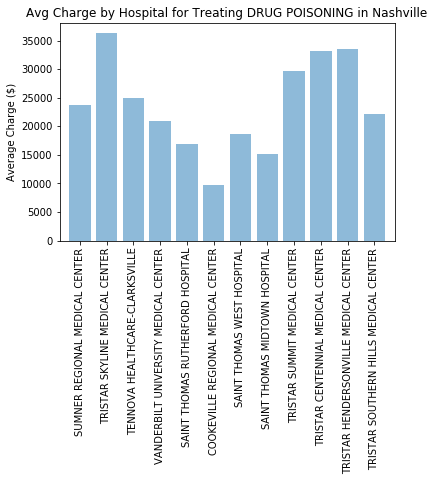

In [94]:
# Create a Bar Chart

AverageChargeValue = drg_DRUG_POISONING_TN_Nashville_Average_Covered_Charge_List
ProviderValues = drg_DRUG_POISONING_TN_Nashville_ProviderList
x_axis = np.arange(len(drg_DRUG_POISONING_TN_Nashville_ProviderList))

plt.bar(x_axis, AverageChargeValue, alpha=0.5, align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ProviderValues, rotation="vertical")

plt.xlim(-0.75, len(x_axis)-0.25)

plt.title("Avg Charge by Hospital for Treating DRUG POISONING in Nashville")
plt.ylabel("Average Charge ($)")


In [95]:
# Store the Average Charge Data for the specific procedure Grouped by State by splitting up the data into groups based upon 'State'
# Filter the DataFrame down only to those columns to chart
Average_DRUG_POISONING_Charge_for_data_grouped_by_State = DataFrame_drg_DRUG_POISONING.groupby(['provider_state'])

# # Convert to DataFrame

Average_DRUG_POISONING_Charge_for_data_grouped_by_State_df = Average_DRUG_POISONING_Charge_for_data_grouped_by_State[["average_covered_charges"]].mean().reset_index()

# Preview DataFrame

Average_DRUG_POISONING_Charge_for_data_grouped_by_State_df.head()


,provider_state,average_covered_charges
0,AK,42025.727270
1,AL,23190.176532
2,AR,15629.443443
3,AZ,31004.188110
4,CA,47580.421116


In [96]:
# Create list to store data of the States for the specific procedure

drg_DRUG_POISONING_State_List = []

for State in Average_DRUG_POISONING_Charge_for_data_grouped_by_State_df["provider_state"]:
    if State not in drg_DRUG_POISONING_State_List:
        drg_DRUG_POISONING_State_List.append(State)
        
drg_DRUG_POISONING_State_List


['AK',
 'AL',
 'AR',
 'AZ',
 'CA',
 'CO',
 'CT',
 'DC',
 'DE',
 'FL',
 'GA',
 'IA',
 'ID',
 'IL',
 'IN',
 'KS',
 'KY',
 'LA',
 'MA',
 'MD',
 'ME',
 'MI',
 'MN',
 'MO',
 'MS',
 'NC',
 'ND',
 'NE',
 'NH',
 'NJ',
 'NM',
 'NV',
 'NY',
 'OH',
 'OK',
 'OR',
 'PA',
 'RI',
 'SC',
 'SD',
 'TN',
 'TX',
 'UT',
 'VA',
 'VT',
 'WA',
 'WI',
 'WV']

In [97]:
# Create list to store data of the Average Charge by State for the specific procedure

drg_DRUG_POISONING_Average_Covered_Charge_by_State_List = []

for Charge in Average_DRUG_POISONING_Charge_for_data_grouped_by_State_df["average_covered_charges"]:
    if Charge not in drg_DRUG_POISONING_Average_Covered_Charge_by_State_List:
        drg_DRUG_POISONING_Average_Covered_Charge_by_State_List.append(Charge)
        
drg_DRUG_POISONING_Average_Covered_Charge_by_State_List


[42025.727269999996,
 23190.17653222222,
 15629.443443299999,
 31004.188109999996,
 47580.42111628572,
 34751.292236,
 22422.213296666665,
 30408.058335,
 15610.339474999999,
 33873.26719774194,
 22544.58568675,
 17652.57446,
 22777.84253,
 22783.819973461545,
 19824.1280798,
 25765.992034000003,
 21365.479781666665,
 24505.6918695,
 15103.364496034485,
 8891.14827911111,
 22311.84184333333,
 15471.463129833333,
 21391.04785916667,
 24473.62098461905,
 23454.66444,
 20436.2404935,
 11690.590909999999,
 19099.629188,
 17532.87106,
 47903.90243333333,
 24160.150526,
 42631.661148571424,
 30703.354868365856,
 20335.712833684207,
 25765.171731538463,
 21906.720925,
 30869.053716296286,
 22129.317636666663,
 30893.370986923077,
 27156.041665,
 23216.76180157895,
 32882.310537105266,
 14549.689395000001,
 21972.550923076924,
 24533.64286,
 21625.664604999998,
 19641.432575000003,
 16233.08197]

In [98]:
# Create a DataFrame of the Average Charge by State for the specific procedure by merging the lists
Average_Charge_of_DRUG_POISONING_per_State = pd.DataFrame({
    "DRG": "918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC",
    "State": drg_DRUG_POISONING_State_List,
    "Average Charge": drg_DRUG_POISONING_Average_Covered_Charge_by_State_List
})
Average_Charge_of_DRUG_POISONING_per_State


,DRG,State,Average Charge
0,918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC,AK,42025.727270
1,918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC,AL,23190.176532
2,918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC,AR,15629.443443
3,918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC,AZ,31004.188110
4,918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC,CA,47580.421116
5,918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC,CO,34751.292236
6,918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC,CT,22422.213297
7,918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC,DC,30408.058335
8,918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC,DE,15610.339475
9,918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC,FL,33873.267198


Text(0, 0.5, 'Average Charge ($)')

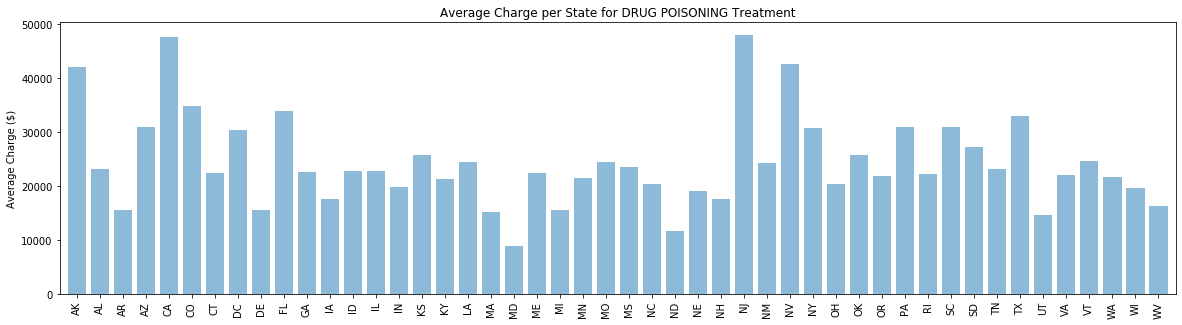

In [99]:
# Create a Bar Chart of the Average Charge per State for DRUG_POISONINGPROCEDURES

drg_DRUG_POISONING_Average_Covered_Charge_by_State_List_Values = drg_DRUG_POISONING_Average_Covered_Charge_by_State_List
drg_DRUG_POISONING_State_List_Values = drg_DRUG_POISONING_State_List
x_axis = np.arange(len(drg_DRUG_POISONING_State_List))

plt.figure(figsize=(20,5))
plt.bar(x_axis, drg_DRUG_POISONING_Average_Covered_Charge_by_State_List_Values, alpha=0.5, align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drg_DRUG_POISONING_State_List_Values, rotation="vertical")

plt.xlim(-0.75, len(x_axis)-0.25)

plt.title("Average Charge per State for DRUG POISONING Treatment")
plt.ylabel("Average Charge ($)")




In [100]:
# Store the Total Discharge Volume Data for the specific procedure Grouped by Provider by splitting up the data into groups based upon 'Provider'
# Filter the DataFrame down only to those columns to chart
DRUG_POISONING_data_grouped_by_Provider = DataFrame_drg_DRUG_POISONING.groupby(['provider_name'])

# # Convert to DataFrame

DRUG_POISONING_Total_Discharge_Volume_for_data_grouped_by_Provider_df = DRUG_POISONING_data_grouped_by_Provider[["total_discharges"]].sum().reset_index()

# Preview DataFrame

DRUG_POISONING_Total_Discharge_Volume_for_data_grouped_by_Provider_df.head()


,provider_name,total_discharges
0,ABBOTT NORTHWESTERN HOSPITAL,18
1,ABINGTON MEMORIAL HOSPITAL,23
2,ADVENTIST HEALTH SONORA,11
3,ADVENTIST HEALTHCARE SHADY GROVE MEDICAL CENTER,12
4,ADVOCATE GOOD SAMARITAN HOSPITAL,11


In [101]:
# Store the Average Charge Data for the specific procedure Grouped by Provider 
# Filter the DataFrame down only to those columns to chart

DRUG_POISONING_Average_Charge_for_data_grouped_by_Provider_df = DRUG_POISONING_data_grouped_by_Provider[["average_covered_charges"]].mean().reset_index()

# Preview DataFrame

DRUG_POISONING_Average_Charge_for_data_grouped_by_Provider_df.head()


,provider_name,average_covered_charges
0,ABBOTT NORTHWESTERN HOSPITAL,28141.833330
1,ABINGTON MEMORIAL HOSPITAL,22158.347830
2,ADVENTIST HEALTH SONORA,49865.181820
3,ADVENTIST HEALTHCARE SHADY GROVE MEDICAL CENTER,7592.083333
4,ADVOCATE GOOD SAMARITAN HOSPITAL,31422.000000


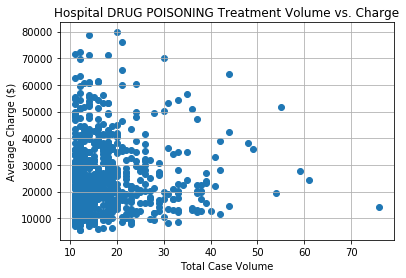

In [102]:
# Build a scatter plot for Total Discharge Volume vs Price
plt.scatter(DRUG_POISONING_Total_Discharge_Volume_for_data_grouped_by_Provider_df["total_discharges"], DRUG_POISONING_Average_Charge_for_data_grouped_by_Provider_df["average_covered_charges"], marker="o")

# Incorporate the other graph properties
plt.title("Hospital DRUG POISONING Treatment Volume vs. Charge")
plt.ylabel("Average Charge ($)")
plt.xlabel("Total Case Volume")
plt.grid(True)


#  HEART FAILURE

In [103]:
# Filter the data so that only a specific diagnosis is in the dataframe - HEARTFAILURE

DataFrame_drg_HEARTFAILURE= DataFrame.loc[DataFrame["drg_definition"] == "291 - HEART FAILURE & SHOCK W MCC", :]

DataFrame_drg_HEARTFAILURE.head()


,drg_definition,provider_id,provider_name,provider_street_address,provider_city,provider_state,provider_zip_code,hospital_referral_region,total_discharges,average_covered_charges,average_total_payments,average_medicare_payments
64,291 - HEART FAILURE & SHOCK W MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,371,34642.04852,7771.625337,6965.857143
181,291 - HEART FAILURE & SHOCK W MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,89,18208.89888,8220.404494,6905.460674
277,291 - HEART FAILURE & SHOCK W MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,238,33568.65966,7310.012605,6292.197479
393,291 - HEART FAILURE & SHOCK W MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,148,44123.34460,8488.864865,7244.081081
463,291 - HEART FAILURE & SHOCK W MCC,10012,DEKALB REGIONAL MEDICAL CENTER,200 MED CENTER DRIVE,FORT PAYNE,AL,35968,AL - Birmingham,32,54984.84375,8317.90625,7620.531250


In [104]:
DataFrame_drg_HEARTFAILURE.describe()

,total_discharges,average_covered_charges,average_medicare_payments
count,2742.000000,2742.000000,2742.000000
mean,131.087527,39896.304689,9353.719921
std,118.821743,23508.295067,2680.185294
min,11.000000,6391.571429,5633.575758
25%,45.000000,23843.433305,7691.255115
50%,98.000000,33195.359650,8603.947500
75%,179.000000,50033.650197,10151.916213
max,1389.000000,175171.472100,43072.833330


In [105]:
# Calculate the Number of Unique Providers that serviced DRG HEART FAILURE diagnosis
Unique_Provider_count_drg_HEARTFAILURE = len(DataFrame_drg_HEARTFAILURE["provider_id"].unique())
Unique_Provider_count_drg_HEARTFAILURE

2742

In [106]:
# Calculate the Unique Number of hospital_referral_region_description that serviced DRG HEART FAILURE diagnosis in the DataFrame
Unique_Hospital_Referral_Region_count_drg_HEARTFAILURE = len(DataFrame_drg_HEARTFAILURE["hospital_referral_region"].unique())
Unique_Hospital_Referral_Region_count_drg_HEARTFAILURE

306

In [107]:
# Calculate the Total Number of Discharges for DRG HEARTFAILURE diagnosis in the DataFrame
Discharge_Count_drg_HEARTFAILURE = (DataFrame_drg_HEARTFAILURE["total_discharges"].sum())
Discharge_Count_drg_HEARTFAILURE

359442

In [108]:
# Cacluate the average covered charges for DRG HEART FAILURE diagnosis
Average_Covered_Charges_drg_HEARTFAILURE = DataFrame_drg_HEARTFAILURE["average_covered_charges"].mean()
Average_Covered_Charges_drg_HEARTFAILURE

39896.304688945

In [109]:
# Cacluate the max covered charge amount for DRG HEARTFAILURE diagnosis
Max_Covered_Charges_drg_HEARTFAILURE = DataFrame_drg_HEARTFAILURE["average_covered_charges"].max()
Max_Covered_Charges_drg_HEARTFAILURE

175171.4721

In [110]:
# Cacluate the min covered charge amount for DRG HEARTFAILURE PROCEDURES
Min_Covered_Charges_drg_HEARTFAILURE = DataFrame_drg_HEARTFAILURE["average_covered_charges"].min()
Min_Covered_Charges_drg_HEARTFAILURE

6391.571429

In [111]:
# Calculate the Total Number of Unique Provider Zip Codes that serviced DRG HEARTFAILURE PROCEDURES
Unique_Provider_ZipCode_Count_drg_HEARTFAILURE = len(DataFrame_drg_HEARTFAILURE["provider_zip_code"].unique())
Unique_Provider_ZipCode_Count_drg_HEARTFAILURE

2571

In [112]:
# Create a summary data frame to hold the DRG HEARTFAILURE PROCEDURES Analysis Results

DRG_Analysis_df_drg_HEARTFAILURE = pd.DataFrame([
    {"Unique Providers that serviced DRG HEARTFAILURE DIAGNOSIS": Unique_Provider_count_drg_HEARTFAILURE, 
     "Unique Provider Zip Codes that serviced DRG HEARTFAILURE DIAGNOSIS": Unique_Provider_ZipCode_Count_drg_HEARTFAILURE, 
     "Total Number of Discharges for DRG HEARTFAILURE DIAGNOSIS": Discharge_Count_drg_HEARTFAILURE,
     "Average Charge for DRG HEARTFAILURE DIAGNOSIS": Average_Covered_Charges_drg_HEARTFAILURE,
     "Max Charge for DRG HEARTFAILURE DIAGNOSIS": Max_Covered_Charges_drg_HEARTFAILURE,
     "Min Charge for DRG HEARTFAILURE DIAGNOSIS": Min_Covered_Charges_drg_HEARTFAILURE
    }
])
DRG_Analysis_df_drg_HEARTFAILURE

,Unique Providers that serviced DRG HEARTFAILURE DIAGNOSIS,Unique Provider Zip Codes that serviced DRG HEARTFAILURE DIAGNOSIS,Total Number of Discharges for DRG HEARTFAILURE DIAGNOSIS,Average Charge for DRG HEARTFAILURE DIAGNOSIS,Max Charge for DRG HEARTFAILURE DIAGNOSIS,Min Charge for DRG HEARTFAILURE DIAGNOSIS
0,2742,2571,359442,39896.304689,175171.4721,6391.571429


In [114]:
# Give the displayed data to hold the DRG HEARTFAILURE PROCEDURES Analysis Results with cleaner formatting

DRG_Analysis_Formatted_df_drg_HEARTFAILURE = DRG_Analysis_df_drg_HEARTFAILURE

DRG_Analysis_Formatted_df_drg_HEARTFAILURE["Average Charge for DRG HEARTFAILURE DIAGNOSIS"] = DRG_Analysis_df_drg_HEARTFAILURE["Average Charge for DRG HEARTFAILURE DIAGNOSIS"].map("${:,.2f}".format)
DRG_Analysis_Formatted_df_drg_HEARTFAILURE["Max Charge for DRG HEARTFAILURE DIAGNOSIS"] = DRG_Analysis_df_drg_HEARTFAILURE["Max Charge for DRG HEARTFAILURE DIAGNOSIS"].map("${:,.2f}".format)
DRG_Analysis_Formatted_df_drg_HEARTFAILURE["Min Charge for DRG HEARTFAILURE DIAGNOSIS"] = DRG_Analysis_df_drg_HEARTFAILURE["Min Charge for DRG HEARTFAILURE DIAGNOSIS"].map("${:,.2f}".format)

DRG_Analysis_Formatted_df_drg_HEARTFAILURE

,Unique Providers that serviced DRG HEARTFAILURE DIAGNOSIS,Unique Provider Zip Codes that serviced DRG HEARTFAILURE DIAGNOSIS,Total Number of Discharges for DRG HEARTFAILURE DIAGNOSIS,Average Charge for DRG HEARTFAILURE DIAGNOSIS,Max Charge for DRG HEARTFAILURE DIAGNOSIS,Min Charge for DRG HEARTFAILURE DIAGNOSIS
0,2742,2571,359442,"$39,896.30","$175,171.47","$6,391.57"


In [115]:
# Filter the data so that only a specific procedure in TN is in the dataframe

DataFrame_drg_HEARTFAILURE_TN = DataFrame.loc[(DataFrame["drg_definition"] == "291 - HEART FAILURE & SHOCK W MCC") & (DataFrame["provider_state"] == "TN"), :]

DataFrame_drg_HEARTFAILURE_TN.head()

,drg_definition,provider_id,provider_name,provider_street_address,provider_city,provider_state,provider_zip_code,hospital_referral_region,total_discharges,average_covered_charges,average_total_payments,average_medicare_payments
162229,291 - HEART FAILURE & SHOCK W MCC,440002,JACKSON-MADISON COUNTY GENERAL HOSPITAL,620 SKYLINE DRIVE,JACKSON,TN,38301,TN - Jackson,673,24555.06092,8556.817236,7644.726597
162360,291 - HEART FAILURE & SHOCK W MCC,440003,SUMNER REGIONAL MEDICAL CENTER,555 HARTSVILLE PIKE,GALLATIN,TN,37066,TN - Nashville,115,40689.97391,8482.582609,7160.634783
162440,291 - HEART FAILURE & SHOCK W MCC,440006,TRISTAR SKYLINE MEDICAL CENTER,3441 DICKERSON PIKE,NASHVILLE,TN,37207,TN - Nashville,134,55289.66418,8825.850746,7673.335821
162500,291 - HEART FAILURE & SHOCK W MCC,440007,UNITY MEDICAL CENTER,481 INTERSTATE DRIVE,MANCHESTER,TN,37355,TN - Nashville,14,12259.78571,9123.142857,8471.142857
162513,291 - HEART FAILURE & SHOCK W MCC,440008,HENDERSON COUNTY COMMUNITY HOSPITAL,200 W CHURCH ST,LEXINGTON,TN,38351,TN - Jackson,12,32747.16667,8816.333333,7941.333333


In [116]:
# Display a statistical overview of the HEARTFAILURE PROCEDURES TN DataFrame for reference

DataFrame_drg_HEARTFAILURE_TN.describe()

,total_discharges,average_covered_charges,average_medicare_payments
count,77.000000,77.000000,77.000000
mean,116.272727,33385.690189,7637.904032
std,150.802209,13672.835281,1364.737844
min,11.000000,12259.785710,6044.807692
25%,25.000000,21690.287230,6849.067797
50%,51.000000,31499.615390,7404.583333
75%,171.000000,40689.973910,7964.870968
max,871.000000,62063.590430,15448.153850


In [117]:
# Calculate the Number of Unique Providers that serviced DRG HEARTFAILURE PROCEDURES in TN
Unique_Provider_count_drg_HEARTFAILURE_TN = len(DataFrame_drg_HEARTFAILURE_TN["provider_id"].unique())
Unique_Provider_count_drg_HEARTFAILURE_TN

77

In [118]:
# Calculate the Unique Number of hospital_referral_region_description that serviced DRG HEARTFAILURE PROCEDURES in TN
Unique_Hospital_Referral_Region_count_drg_HEARTFAILURE_TN = len(DataFrame_drg_HEARTFAILURE_TN["hospital_referral_region"].unique())
Unique_Hospital_Referral_Region_count_drg_HEARTFAILURE_TN

8

In [119]:
# Calculate the Total Number of Discharges for DRG HEARTFAILURE PROCEDURES in TN
Discharge_Count_drg_HEARTFAILURE_TN = (DataFrame_drg_HEARTFAILURE_TN["total_discharges"].sum())
Discharge_Count_drg_HEARTFAILURE_TN

8953

In [120]:
# Cacluate the average covered charges for DRG HEARTFAILURE PROCEDURES in TN
Average_Covered_Charges_drg_HEARTFAILURE_TN = DataFrame_drg_HEARTFAILURE_TN["average_covered_charges"].mean()
Average_Covered_Charges_drg_HEARTFAILURE_TN

33385.690189350644

In [121]:
# Cacluate the min covered charge amount for DRG HEART FAILURE PROCEDURES in TN
Min_Covered_Charges_drg_HEARTFAILURE_TN = DataFrame_drg_HEARTFAILURE_TN["average_covered_charges"].min()
Min_Covered_Charges_drg_HEARTFAILURE_TN

12259.78571

In [122]:
# Cacluate the max covered charge amount for DRG HEARTFAILURE PROCEDURES in TN
Max_Covered_Charges_drg_HEARTFAILURE_TN = DataFrame_drg_HEARTFAILURE_TN["average_covered_charges"].max()
Max_Covered_Charges_drg_HEARTFAILURE_TN

62063.59043

In [123]:
# Calculate the Total Number of Unique Provider Zip Codes that serviced DRG HEARTFAILURE PROCEDURES in TN
Unique_Provider_ZipCode_Count_drg_HEARTFAILURE_TN = len(DataFrame_drg_HEARTFAILURE_TN["provider_zip_code"].unique())
Unique_Provider_ZipCode_Count_drg_HEARTFAILURE_TN

75

In [124]:
# Create a summary data frame to hold the DRG HEARTFAILURE PROCEDURES in TN Analysis Results

DRG_Analysis_df_drg_HEARTFAILURE_TN = pd.DataFrame([
    {"Unique Providers that serviced DRG HEARTFAILURE DIAGNOSIS in TN": Unique_Provider_count_drg_HEARTFAILURE_TN, 
     "Unique Provider Zip Codes that serviced DRG HEARTFAILURE DIAGNOSIS in TN": Unique_Provider_ZipCode_Count_drg_HEARTFAILURE_TN, 
     "Total Number of Discharges for DRG HEARTFAILURE DIAGNOSIS in TN": Discharge_Count_drg_HEARTFAILURE_TN,
     "Average Charge for DRG HEARTFAILURE DIAGNOSIS in TN": Average_Covered_Charges_drg_HEARTFAILURE_TN,
     "Max Charge for DRG HEARTFAILURE DIAGNOSIS in TN": Max_Covered_Charges_drg_HEARTFAILURE_TN,
     "Min Charge for DRG HEARTFAILURE DIAGNOSIS in TN": Min_Covered_Charges_drg_HEARTFAILURE_TN
    }
])
DRG_Analysis_df_drg_HEARTFAILURE_TN

,Unique Providers that serviced DRG HEARTFAILURE DIAGNOSIS in TN,Unique Provider Zip Codes that serviced DRG HEARTFAILURE DIAGNOSIS in TN,Total Number of Discharges for DRG HEARTFAILURE DIAGNOSIS in TN,Average Charge for DRG HEARTFAILURE DIAGNOSIS in TN,Max Charge for DRG HEARTFAILURE DIAGNOSIS in TN,Min Charge for DRG HEARTFAILURE DIAGNOSIS in TN
0,77,75,8953,33385.690189,62063.59043,12259.78571


In [125]:
# Give the displayed data to hold the DRG HEARTFAILURE PROCEDURES in TN Analysis Results with cleaner formatting

DRG_Analysis_Formatted_df_drg_HEARTFAILURE_TN = DRG_Analysis_df_drg_HEARTFAILURE_TN

DRG_Analysis_Formatted_df_drg_HEARTFAILURE_TN["Average Charge for DRG HEARTFAILURE DIAGNOSIS in TN"] = DRG_Analysis_df_drg_HEARTFAILURE_TN["Average Charge for DRG HEARTFAILURE DIAGNOSIS in TN"].map("${:,.2f}".format)
DRG_Analysis_Formatted_df_drg_HEARTFAILURE_TN["Max Charge for DRG HEARTFAILURE DIAGNOSIS in TN"] = DRG_Analysis_df_drg_HEARTFAILURE_TN["Max Charge for DRG HEARTFAILURE DIAGNOSIS in TN"].map("${:,.2f}".format)
DRG_Analysis_Formatted_df_drg_HEARTFAILURE_TN["Min Charge for DRG HEARTFAILURE DIAGNOSIS in TN"] = DRG_Analysis_df_drg_HEARTFAILURE_TN["Min Charge for DRG HEARTFAILURE DIAGNOSIS in TN"].map("${:,.2f}".format)

DRG_Analysis_Formatted_df_drg_HEARTFAILURE_TN

,Unique Providers that serviced DRG HEARTFAILURE DIAGNOSIS in TN,Unique Provider Zip Codes that serviced DRG HEARTFAILURE DIAGNOSIS in TN,Total Number of Discharges for DRG HEARTFAILURE DIAGNOSIS in TN,Average Charge for DRG HEARTFAILURE DIAGNOSIS in TN,Max Charge for DRG HEARTFAILURE DIAGNOSIS in TN,Min Charge for DRG HEARTFAILURE DIAGNOSIS in TN
0,77,75,8953,"$33,385.69","$62,063.59","$12,259.79"


In [126]:
# Store the Average Charge Data for the specific procedure Grouped by Region by splitting up the data into groups based upon 'Region'
# Filter the DataFrame down only to those columns to chart
HEARTFAILURE_data_grouped_by_Region_in_TN = DataFrame_drg_HEARTFAILURE_TN.groupby(['hospital_referral_region'])

# Convert to DataFrame

HEARTFAILURE_Avg_Charge_data_grouped_by_Region_in_TN_df = HEARTFAILURE_data_grouped_by_Region_in_TN[["average_covered_charges"]].mean().reset_index()

# Preview DataFrame

HEARTFAILURE_Avg_Charge_data_grouped_by_Region_in_TN_df.head()

,hospital_referral_region,average_covered_charges
0,AL - Huntsville,14585.000000
1,TN - Chattanooga,44162.974620
2,TN - Jackson,30066.514401
3,TN - Johnson City,38259.483153
4,TN - Kingsport,33275.337057


In [127]:
# Create list to store data of the Regions in TN for the specific procedure

drg_HEARTFAILURE_TN_Region_List = []

for Region in HEARTFAILURE_Avg_Charge_data_grouped_by_Region_in_TN_df["hospital_referral_region"]:
    if Region not in drg_HEARTFAILURE_TN_Region_List:
        drg_HEARTFAILURE_TN_Region_List.append(Region)
        
drg_HEARTFAILURE_TN_Region_List

['AL - Huntsville',
 'TN - Chattanooga',
 'TN - Jackson',
 'TN - Johnson City',
 'TN - Kingsport',
 'TN - Knoxville',
 'TN - Memphis',
 'TN - Nashville']

In [128]:
# Create list to store data of the Average Charge by Region in TN for the specific procedure

drg_HEARTFAILURE_TN_Average_Covered_Charge_List = []

for Charge in HEARTFAILURE_Avg_Charge_data_grouped_by_Region_in_TN_df["average_covered_charges"]:
    if Charge not in drg_HEARTFAILURE_TN_Average_Covered_Charge_List:
        drg_HEARTFAILURE_TN_Average_Covered_Charge_List.append(Charge)
        
drg_HEARTFAILURE_TN_Average_Covered_Charge_List

[14585.0,
 44162.97461999999,
 30066.51440125,
 38259.483153333334,
 33275.33705666666,
 27511.23463666667,
 39026.27211888888,
 34770.51605580645]

In [129]:
# Create a DataFrame of the Average Charge by Region in TN for the specific procedure by merging the lists
Average_Charge_of_HEARTFAILURE_per_Region_TN = pd.DataFrame({
    "DRG": "291 - HEART FAILURE & SHOCK W MCC",
    "Region": drg_HEARTFAILURE_TN_Region_List,
    "Average Charge": drg_HEARTFAILURE_TN_Average_Covered_Charge_List
})
Average_Charge_of_HEARTFAILURE_per_Region_TN

,DRG,Region,Average Charge
0,291 - HEART FAILURE & SHOCK W MCC,AL - Huntsville,14585.000000
1,291 - HEART FAILURE & SHOCK W MCC,TN - Chattanooga,44162.974620
2,291 - HEART FAILURE & SHOCK W MCC,TN - Jackson,30066.514401
3,291 - HEART FAILURE & SHOCK W MCC,TN - Johnson City,38259.483153
4,291 - HEART FAILURE & SHOCK W MCC,TN - Kingsport,33275.337057
5,291 - HEART FAILURE & SHOCK W MCC,TN - Knoxville,27511.234637
6,291 - HEART FAILURE & SHOCK W MCC,TN - Memphis,39026.272119
7,291 - HEART FAILURE & SHOCK W MCC,TN - Nashville,34770.516056


Text(0, 0.5, 'Average Charge ($)')

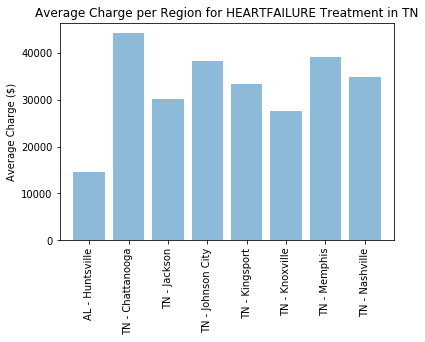

In [130]:
# Create a Bar Chart of the Average Charge per Region for HEARTFAILURE PROCEDURES in TN

drg_HEARTFAILURE_TN_Average_Covered_Charge_List_Values = drg_HEARTFAILURE_TN_Average_Covered_Charge_List
drg_HEARTFAILURE_TN_Region_List_Values = drg_HEARTFAILURE_TN_Region_List
x_axis = np.arange(len(drg_HEARTFAILURE_TN_Region_List))

plt.bar(x_axis, drg_HEARTFAILURE_TN_Average_Covered_Charge_List_Values, alpha=0.5, align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drg_HEARTFAILURE_TN_Region_List_Values, rotation="vertical")

plt.xlim(-0.75, len(x_axis)-0.25)

plt.title("Average Charge per Region for HEARTFAILURE Treatment in TN")
plt.ylabel("Average Charge ($)")

In [131]:
# Filter the data so that only a specific procedure in Nashville TN is in the dataframe

DataFrame_drg_HEARTFAILURE_TN_Nashville = DataFrame.loc[(DataFrame["drg_definition"] == "291 - HEART FAILURE & SHOCK W MCC") & (DataFrame["provider_state"] == "TN") & (DataFrame["hospital_referral_region"] == "TN - Nashville"),:]

DataFrame_drg_HEARTFAILURE_TN_Nashville.head()

,drg_definition,provider_id,provider_name,provider_street_address,provider_city,provider_state,provider_zip_code,hospital_referral_region,total_discharges,average_covered_charges,average_total_payments,average_medicare_payments
162360,291 - HEART FAILURE & SHOCK W MCC,440003,SUMNER REGIONAL MEDICAL CENTER,555 HARTSVILLE PIKE,GALLATIN,TN,37066,TN - Nashville,115,40689.97391,8482.582609,7160.634783
162440,291 - HEART FAILURE & SHOCK W MCC,440006,TRISTAR SKYLINE MEDICAL CENTER,3441 DICKERSON PIKE,NASHVILLE,TN,37207,TN - Nashville,134,55289.66418,8825.850746,7673.335821
162500,291 - HEART FAILURE & SHOCK W MCC,440007,UNITY MEDICAL CENTER,481 INTERSTATE DRIVE,MANCHESTER,TN,37355,TN - Nashville,14,12259.78571,9123.142857,8471.142857
162537,291 - HEART FAILURE & SHOCK W MCC,440009,CUMBERLAND MEDICAL CENTER,421 S MAIN ST,CROSSVILLE,TN,38555,TN - Nashville,101,17219.19802,8961.60396,8074.455446
163160,291 - HEART FAILURE & SHOCK W MCC,440029,WILLIAMSON MEDICAL CENTER,4321 CAROTHERS PARKWAY,FRANKLIN,TN,37067,TN - Nashville,118,17813.93220,8161.70339,6849.067797


In [132]:
# Display a statistical overview of the HEARTFAILURE PROCEDURES Nashville TN DataFrame for reference

DataFrame_drg_HEARTFAILURE_TN_Nashville.describe()

,total_discharges,average_covered_charges,average_medicare_payments
count,31.000000,31.000000,31.000000
mean,100.161290,34770.516056,7915.369304
std,86.461589,14651.689268,1170.253144
min,11.000000,12259.785710,6787.269231
25%,28.500000,21103.646630,7360.994641
50%,64.000000,34064.860660,7630.340000
75%,132.000000,41989.386955,8058.208115
max,318.000000,62063.590430,12523.272730


In [133]:
# Calculate the Number of Unique Providers that serviced DRG HEARTFAILURE PROCEDURES in Nashville TN
Unique_Provider_count_drg_HEARTFAILURE_TN_Nashville = len(DataFrame_drg_HEARTFAILURE_TN_Nashville["provider_id"].unique())
Unique_Provider_count_drg_HEARTFAILURE_TN_Nashville

31

In [134]:
# Calculate the Total Number of Discharges for DRG HEARTFAILURE PROCEDURES in Nasvhville TN
Discharge_Count_drg_HEARTFAILURE_TN_Nashville = (DataFrame_drg_HEARTFAILURE_TN_Nashville["total_discharges"].sum())
Discharge_Count_drg_HEARTFAILURE_TN_Nashville

3105

In [135]:
# Cacluate the average covered charges for DRG HEARTFAILURE PROCEDURES in Nashville TN
Average_Covered_Charges_drg_HEARTFAILURE_TN_Nashville = DataFrame_drg_HEARTFAILURE_TN_Nashville["average_covered_charges"].mean()
Average_Covered_Charges_drg_HEARTFAILURE_TN_Nashville

34770.51605580645

In [136]:
# Cacluate the min covered charge amount for DRG HEARTFAILURE PROCEDURES in Nashville TN
Min_Covered_Charges_drg_HEARTFAILURE_TN_Nashville = DataFrame_drg_HEARTFAILURE_TN_Nashville["average_covered_charges"].min()
Min_Covered_Charges_drg_HEARTFAILURE_TN_Nashville

12259.78571

In [137]:
# Cacluate the max covered charge amount for DRG HEARTFAILURE PROCEDURES in Nashville TN
Max_Covered_Charges_drg_HEARTFAILURE_TN_Nashville = DataFrame_drg_HEARTFAILURE_TN_Nashville["average_covered_charges"].max()
Max_Covered_Charges_drg_HEARTFAILURE_TN_Nashville

62063.59043

In [138]:
# Calculate the Total Number of Unique Provider Zip Codes that serviced DRG HEARTFAILURE PROCEDURES in Nashville TN
Unique_Provider_ZipCode_Count_drg_HEARTFAILURE_TN_Nashville = len(DataFrame_drg_HEARTFAILURE_TN_Nashville["provider_zip_code"].unique())
Unique_Provider_ZipCode_Count_drg_HEARTFAILURE_TN_Nashville

31

In [139]:
# Create a summary data frame to hold the DRG HEARTFAILURE PROCEDURES in Nashville TN Analysis Results

DRG_Analysis_df_drg_HEARTFAILURE_TN_Nashville = pd.DataFrame([
    {"Unique Providers that serviced DRG HEARTFAILURE PROCEDURES in Nashville TN": Unique_Provider_count_drg_HEARTFAILURE_TN_Nashville, 
     "Unique Provider Zip Codes that serviced DRG HEARTFAILURE DIAGNOSIS in Nashville TN": Unique_Provider_ZipCode_Count_drg_HEARTFAILURE_TN_Nashville, 
     "Total Number of Discharges for DRG HEARTFAILURE DIAGNOSIS in Nashville TN": Discharge_Count_drg_HEARTFAILURE_TN_Nashville,
     "Average Charge for DRG HEARTFAILURE DIAGNOSIS in Nashville TN": Average_Covered_Charges_drg_HEARTFAILURE_TN_Nashville,
     "Max Charge for DRG HEARTFAILURE DIAGNOSIS in Nashville TN": Max_Covered_Charges_drg_HEARTFAILURE_TN_Nashville,
     "Min Charge for DRG HEARTFAILURE DIAGNOSIS in Nashville TN": Min_Covered_Charges_drg_HEARTFAILURE_TN_Nashville
    }
])
DRG_Analysis_df_drg_HEARTFAILURE_TN_Nashville

,Unique Providers that serviced DRG HEARTFAILURE PROCEDURES in Nashville TN,Unique Provider Zip Codes that serviced DRG HEARTFAILURE DIAGNOSIS in Nashville TN,Total Number of Discharges for DRG HEARTFAILURE DIAGNOSIS in Nashville TN,Average Charge for DRG HEARTFAILURE DIAGNOSIS in Nashville TN,Max Charge for DRG HEARTFAILURE DIAGNOSIS in Nashville TN,Min Charge for DRG HEARTFAILURE DIAGNOSIS in Nashville TN
0,31,31,3105,34770.516056,62063.59043,12259.78571


In [140]:
# Give the displayed data to hold the DRG HEARTFAILURE PROCEDURES in Nasvhille TN Analysis Results with cleaner formatting

DRG_Analysis_Formatted_df_drg_HEARTFAILURE_TN_Nashville = DRG_Analysis_df_drg_HEARTFAILURE_TN_Nashville

DRG_Analysis_Formatted_df_drg_HEARTFAILURE_TN_Nashville["Average Charge for DRG HEARTFAILURE DIAGNOSIS in Nashville TN"] = DRG_Analysis_df_drg_HEARTFAILURE_TN_Nashville["Average Charge for DRG HEARTFAILURE DIAGNOSIS in Nashville TN"].map("${:,.2f}".format)
DRG_Analysis_Formatted_df_drg_HEARTFAILURE_TN_Nashville["Max Charge for DRG HEARTFAILURE DIAGNOSIS in Nashville TN"] = DRG_Analysis_df_drg_HEARTFAILURE_TN_Nashville["Max Charge for DRG HEARTFAILURE DIAGNOSIS in Nashville TN"].map("${:,.2f}".format)
DRG_Analysis_Formatted_df_drg_HEARTFAILURE_TN_Nashville["Min Charge for DRG HEARTFAILURE DIAGNOSIS in Nashville TN"] = DRG_Analysis_df_drg_HEARTFAILURE_TN_Nashville["Min Charge for DRG HEARTFAILURE DIAGNOSIS in Nashville TN"].map("${:,.2f}".format)

DRG_Analysis_Formatted_df_drg_HEARTFAILURE_TN_Nashville

,Unique Providers that serviced DRG HEARTFAILURE PROCEDURES in Nashville TN,Unique Provider Zip Codes that serviced DRG HEARTFAILURE DIAGNOSIS in Nashville TN,Total Number of Discharges for DRG HEARTFAILURE DIAGNOSIS in Nashville TN,Average Charge for DRG HEARTFAILURE DIAGNOSIS in Nashville TN,Max Charge for DRG HEARTFAILURE DIAGNOSIS in Nashville TN,Min Charge for DRG HEARTFAILURE DIAGNOSIS in Nashville TN
0,31,31,3105,"$34,770.52","$62,063.59","$12,259.79"


In [141]:
# Create list to store data of the Providers in Nashville for the specific procedure

drg_HEARTFAILURE_TN_Nashville_ProviderList = []

for Provider in DataFrame_drg_HEARTFAILURE_TN_Nashville["provider_name"]:
    if Provider not in drg_HEARTFAILURE_TN_Nashville_ProviderList:
        drg_HEARTFAILURE_TN_Nashville_ProviderList.append(Provider)
        
drg_HEARTFAILURE_TN_Nashville_ProviderList

['SUMNER REGIONAL MEDICAL CENTER',
 'TRISTAR SKYLINE MEDICAL CENTER',
 'UNITY MEDICAL CENTER',
 'CUMBERLAND MEDICAL CENTER',
 'WILLIAMSON MEDICAL CENTER',
 'TENNOVA HEALTHCARE-CLARKSVILLE',
 'VANDERBILT UNIVERSITY MEDICAL CENTER',
 'TRISTAR HORIZON MEDICAL CENTER',
 'SAINT THOMAS RUTHERFORD HOSPITAL',
 'SOUTHERN TENNESSEE REGIONAL HLTH SYSTEM WINCHESTER',
 'COOKEVILLE REGIONAL MEDICAL CENTER',
 'NORTHCREST MEDICAL CENTER',
 'MAURY REGIONAL HOSPITAL',
 'SAINT THOMAS WEST HOSPITAL',
 'TENNOVA HEALTHCARE - JAMESTOWN',
 'METRO NASHVILLE GENERAL HOSPITAL',
 'SAINT THOMAS MIDTOWN HOSPITAL',
 'TENNOVA HEALTHCARE-SHELBYVILLE',
 'TENNOVA HEALTHCARE-HARTON',
 'SAINT THOMAS DEKALB HOSPITAL',
 'TRISTAR SUMMIT MEDICAL CENTER',
 'SAINT THOMAS RIVER PARK HOSPITAL',
 'TRISTAR CENTENNIAL MEDICAL CENTER',
 'SOUTHERN TENNESSEE REGIONAL HEALTH SYSTEM LAWRENCE',
 'LIVINGSTON REGIONAL HOSPITAL',
 'SAINT THOMAS HIGHLANDS HOSPITAL',
 'TENNOVA HEALTHCARE-LEBANON',
 'TRISTAR HENDERSONVILLE MEDICAL CENTER',
 'TR

In [142]:
# Create list to store data of the Average Charge in Nashville for the specific procedure

drg_HEARTFAILURE_TN_Nashville_Average_Covered_Charge_List = []

for Charge in DataFrame_drg_HEARTFAILURE_TN_Nashville["average_covered_charges"]:
    if Charge not in drg_HEARTFAILURE_TN_Nashville_Average_Covered_Charge_List:
        drg_HEARTFAILURE_TN_Nashville_Average_Covered_Charge_List.append(Charge)
        
drg_HEARTFAILURE_TN_Nashville_Average_Covered_Charge_List

[40689.97391,
 55289.66417999999,
 12259.78571,
 17219.19802,
 17813.9322,
 50064.26087,
 43288.8,
 34064.860660000006,
 30210.63033,
 36721.92308,
 16768.358269999997,
 25721.0,
 19747.241530000003,
 35525.2044,
 39438.96154,
 19984.45455,
 31038.397060000003,
 39691.73913,
 56116.6087,
 18180.875,
 55807.94615,
 26987.67188,
 62063.59043,
 33375.77586,
 30212.70455,
 22222.83871,
 53280.21569,
 60157.37975,
 40477.55102,
 13859.45455,
 39605.0]

In [143]:
# Create a DataFrame of the Average Charge of HEARTFAILURE per Provider in Nashville by merging the lists
Average_Charge_of_HEARTFAILURE_per_Provider_Nashvile_df = pd.DataFrame({
    "DRG": "291 - HEART FAILURE & SHOCK W MCC",
    "Provider": drg_HEARTFAILURE_TN_Nashville_ProviderList,
    "Average Charge": drg_HEARTFAILURE_TN_Nashville_Average_Covered_Charge_List
})
Average_Charge_of_HEARTFAILURE_per_Provider_Nashvile_df

,DRG,Provider,Average Charge
0,291 - HEART FAILURE & SHOCK W MCC,SUMNER REGIONAL MEDICAL CENTER,40689.97391
1,291 - HEART FAILURE & SHOCK W MCC,TRISTAR SKYLINE MEDICAL CENTER,55289.66418
2,291 - HEART FAILURE & SHOCK W MCC,UNITY MEDICAL CENTER,12259.78571
3,291 - HEART FAILURE & SHOCK W MCC,CUMBERLAND MEDICAL CENTER,17219.19802
4,291 - HEART FAILURE & SHOCK W MCC,WILLIAMSON MEDICAL CENTER,17813.93220
5,291 - HEART FAILURE & SHOCK W MCC,TENNOVA HEALTHCARE-CLARKSVILLE,50064.26087
6,291 - HEART FAILURE & SHOCK W MCC,VANDERBILT UNIVERSITY MEDICAL CENTER,43288.80000
7,291 - HEART FAILURE & SHOCK W MCC,TRISTAR HORIZON MEDICAL CENTER,34064.86066
8,291 - HEART FAILURE & SHOCK W MCC,SAINT THOMAS RUTHERFORD HOSPITAL,30210.63033
9,291 - HEART FAILURE & SHOCK W MCC,SOUTHERN TENNESSEE REGIONAL HLTH SYSTEM WINCHE...,36721.92308


Text(0, 0.5, 'Average Charge ($)')

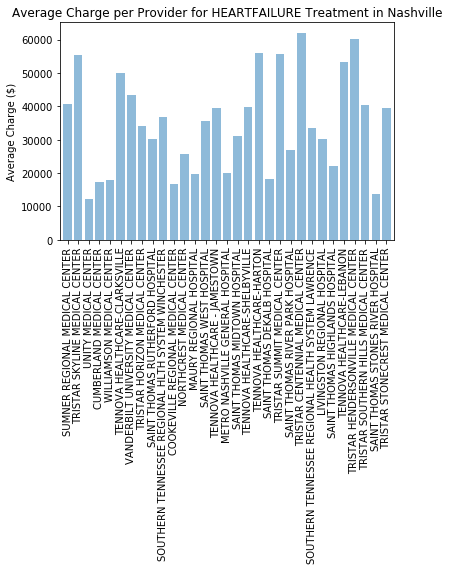

In [144]:
# Create a Bar Chart

AverageChargeValue = drg_HEARTFAILURE_TN_Nashville_Average_Covered_Charge_List
ProviderValues = drg_HEARTFAILURE_TN_Nashville_ProviderList
x_axis = np.arange(len(drg_HEARTFAILURE_TN_Nashville_ProviderList))

plt.bar(x_axis, AverageChargeValue, alpha=0.5, align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ProviderValues, rotation="vertical")

plt.xlim(-0.75, len(x_axis)-0.25)

plt.title("Average Charge per Provider for HEARTFAILURE Treatment in Nashville")
plt.ylabel("Average Charge ($)")

In [145]:
# Store the Average Charge Data for the specific procedure Grouped by State by splitting up the data into groups based upon 'State'
# Filter the DataFrame down only to those columns to chart
Average_HEARTFAILURE_Charge_for_data_grouped_by_State = DataFrame_drg_HEARTFAILURE.groupby(['provider_state'])

# # Convert to DataFrame

Average_HEARTFAILURE_Charge_for_data_grouped_by_State_df = Average_HEARTFAILURE_Charge_for_data_grouped_by_State[["average_covered_charges"]].mean().reset_index()

# Preview DataFrame

Average_HEARTFAILURE_Charge_for_data_grouped_by_State_df.head()

,provider_state,average_covered_charges
0,AK,55543.229999
1,AL,35177.564755
2,AR,27935.228379
3,AZ,48375.651785
4,CA,70308.731960


In [146]:
# Create list to store data of the States for the specific procedure

drg_HEARTFAILURE_State_List = []

for State in Average_HEARTFAILURE_Charge_for_data_grouped_by_State_df["provider_state"]:
    if State not in drg_HEARTFAILURE_State_List:
        drg_HEARTFAILURE_State_List.append(State)
        
drg_HEARTFAILURE_State_List

['AK',
 'AL',
 'AR',
 'AZ',
 'CA',
 'CO',
 'CT',
 'DC',
 'DE',
 'FL',
 'GA',
 'HI',
 'IA',
 'ID',
 'IL',
 'IN',
 'KS',
 'KY',
 'LA',
 'MA',
 'MD',
 'ME',
 'MI',
 'MN',
 'MO',
 'MS',
 'MT',
 'NC',
 'ND',
 'NE',
 'NH',
 'NJ',
 'NM',
 'NV',
 'NY',
 'OH',
 'OK',
 'OR',
 'PA',
 'RI',
 'SC',
 'SD',
 'TN',
 'TX',
 'UT',
 'VA',
 'VT',
 'WA',
 'WI',
 'WV',
 'WY']

In [147]:
# Create list to store data of the Average Charge by State for the specific procedure

drg_HEARTFAILURE_Average_Covered_Charge_by_State_List = []

for Charge in Average_HEARTFAILURE_Charge_for_data_grouped_by_State_df["average_covered_charges"]:
    if Charge not in drg_HEARTFAILURE_Average_Covered_Charge_by_State_List:
        drg_HEARTFAILURE_Average_Covered_Charge_by_State_List.append(Charge)
        
drg_HEARTFAILURE_Average_Covered_Charge_by_State_List

[55543.229998571434,
 35177.56475482758,
 27935.22837948572,
 48375.65178466667,
 70308.73195976918,
 46948.33299351351,
 32701.759977107144,
 46005.28356999999,
 28454.99677166666,
 54354.248079000005,
 33365.295771463396,
 32604.22919166667,
 26607.219801724135,
 32370.274874444443,
 38112.40790778333,
 31055.920911111112,
 33508.89031969698,
 31938.68101859649,
 31529.433752491525,
 20500.068279423085,
 14361.979798545452,
 21399.020101875,
 24307.39825850618,
 25366.753009318185,
 33285.09708301588,
 37774.35624152175,
 23069.375238,
 25938.570853291134,
 22857.42409,
 29848.333054736846,
 29472.757210769232,
 83174.11382904758,
 35150.21264208333,
 69617.68535,
 40448.74054343704,
 30270.376600630632,
 32020.114595745094,
 29075.046230645163,
 40833.291768291354,
 27664.782051000006,
 35501.132842244915,
 27863.374258181822,
 33385.690189350644,
 46940.75473014634,
 27832.632924999994,
 29796.22797095891,
 19200.647950000002,
 38857.659846170216,
 25928.811776451606,
 24340.616240

In [148]:
# Create a DataFrame of the Average Charge by State for the specific procedure by merging the lists
Average_Charge_of_HEARTFAILURE_per_State = pd.DataFrame({
    "DRG": "291 - HEART FAILURE & SHOCK W MCC",
    "State": drg_HEARTFAILURE_State_List,
    "Average Charge": drg_HEARTFAILURE_Average_Covered_Charge_by_State_List
})
Average_Charge_of_HEARTFAILURE_per_State

,DRG,State,Average Charge
0,291 - HEART FAILURE & SHOCK W MCC,AK,55543.229999
1,291 - HEART FAILURE & SHOCK W MCC,AL,35177.564755
2,291 - HEART FAILURE & SHOCK W MCC,AR,27935.228379
3,291 - HEART FAILURE & SHOCK W MCC,AZ,48375.651785
4,291 - HEART FAILURE & SHOCK W MCC,CA,70308.731960
5,291 - HEART FAILURE & SHOCK W MCC,CO,46948.332994
6,291 - HEART FAILURE & SHOCK W MCC,CT,32701.759977
7,291 - HEART FAILURE & SHOCK W MCC,DC,46005.283570
8,291 - HEART FAILURE & SHOCK W MCC,DE,28454.996772
9,291 - HEART FAILURE & SHOCK W MCC,FL,54354.248079


Text(0, 0.5, 'Average Charge ($)')

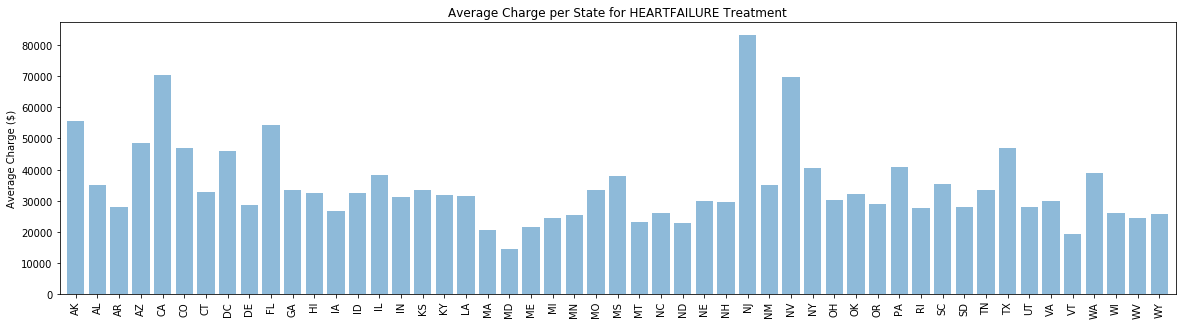

In [149]:
# Create a Bar Chart of the Average Charge per State for HEARTFAILURE PROCEDURES

drg_HEARTFAILURE_Average_Covered_Charge_by_State_List_Values = drg_HEARTFAILURE_Average_Covered_Charge_by_State_List
drg_HEARTFAILURE_State_List_Values = drg_HEARTFAILURE_State_List
x_axis = np.arange(len(drg_HEARTFAILURE_State_List))

plt.figure(figsize=(20,5))
plt.bar(x_axis, drg_HEARTFAILURE_Average_Covered_Charge_by_State_List_Values, alpha=0.5, align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drg_HEARTFAILURE_State_List_Values, rotation="vertical")

plt.xlim(-0.75, len(x_axis)-0.25)

plt.title("Average Charge per State for HEARTFAILURE Treatment")
plt.ylabel("Average Charge ($)")

In [150]:
# Store the Total Discharge Volume Data for the specific procedure Grouped by Provider by splitting up the data into groups based upon 'Provider'
# Filter the DataFrame down only to those columns to chart
HEARTFAILURE_data_grouped_by_Provider = DataFrame_drg_HEARTFAILURE.groupby(['provider_name'])

# # Convert to DataFrame

HEARTFAILURE_Total_Discharge_Volume_for_data_grouped_by_Provider_df = HEARTFAILURE_data_grouped_by_Provider[["total_discharges"]].sum().reset_index()

# Preview DataFrame

HEARTFAILURE_Total_Discharge_Volume_for_data_grouped_by_Provider_df.head()

,provider_name,total_discharges
0,ABBEVILLE GENERAL HOSPITAL,51
1,ABBOTT NORTHWESTERN HOSPITAL,340
2,ABILENE REGIONAL MEDICAL CENTER,61
3,ABINGTON MEMORIAL HOSPITAL,251
4,ABRAZO ARROWHEAD CAMPUS,104


In [151]:
# Store the Average Charge Data for the specific procedure Grouped by Provider 
# Filter the DataFrame down only to those columns to chart

HEARTFAILURE_Average_Charge_for_data_grouped_by_Provider_df = HEARTFAILURE_data_grouped_by_Provider[["average_covered_charges"]].mean().reset_index()

# Preview DataFrame

HEARTFAILURE_Average_Charge_for_data_grouped_by_Provider_df.head()

,provider_name,average_covered_charges
0,ABBEVILLE GENERAL HOSPITAL,31180.37255
1,ABBOTT NORTHWESTERN HOSPITAL,35676.76765
2,ABILENE REGIONAL MEDICAL CENTER,55754.54098
3,ABINGTON MEMORIAL HOSPITAL,47310.49402
4,ABRAZO ARROWHEAD CAMPUS,42486.91346


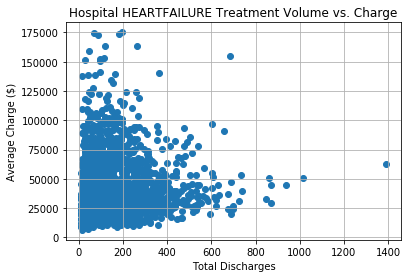

In [152]:
# Build a scatter plot for Total Discharge Volume vs Price
plt.scatter(HEARTFAILURE_Total_Discharge_Volume_for_data_grouped_by_Provider_df["total_discharges"], HEARTFAILURE_Average_Charge_for_data_grouped_by_Provider_df["average_covered_charges"], marker="o")

# Incorporate the other graph properties
plt.title("Hospital HEARTFAILURE Treatment Volume vs. Charge")
plt.ylabel("Average Charge ($)")
plt.xlabel("Total Discharges")
plt.grid(True)